# 0. Конфигурация сеанса

In [133]:
import numpy as np

import pandas as pd
pd.options.display.max_columns = 50

import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')

from scipy.stats import kstest, spearmanr, mannwhitneyu, ttest_ind, levene, kruskal, pearsonr

from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
from sklearn.metrics import r2_score

from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline

import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, mean_absolute_error 
import operator

# import warnings
# warnings.simplefilter("ignore")

# 1. Основные характеристики

In [2]:
data = pd.read_csv('housing.csv',true_values=['yes'], false_values=['no'])

# Replacing Y-column into the start for our all convenience
cols = list(data.columns.values)
cols.remove('price_doc')
cols.insert(0,'price_doc')
data = data[cols]

# Printing Data's size
print(f"Num of rows: {len(data)}, Num of cols: {data.shape[1]}")

Num of rows: 8894, Num of cols: 36


### Набор данных о продаже недвижимости в Москве в 2014 году.

In [3]:
data.head(10)

price_doc  full_sq  life_sq  floor  max_floor     material  build_year  \
0    5150000       38     18.0    1.0       14.0        panel      1971.0   
1    5980000       41     17.0   14.0       16.0        panel      1978.0   
2    4600000       41     20.0   11.0       14.0        panel      1989.0   
3    5650000       38     19.0    6.0       17.0        panel      1986.0   
4    9300000       58     37.0    3.0        9.0        panel      1968.0   
5   11000000       63     46.0    5.0        9.0        panel      1968.0   
6    5200000       32     18.0    5.0        9.0        panel      1968.0   
7    5800000       37     19.0   12.0       14.0  breezeblock      1975.0   
8    3000000       41     17.0   16.0       25.0        panel      2010.0   
9    3000000       60     36.0    5.0        7.0        brick      1995.0   

   num_room  kitch_sq                 sub_area        area_m  green_zone_part  \
0       1.0       9.0              Dmitrovskoe  7.126815e+06         0.125882   
1       1.0      10.0              Savelovskoe  2.641243e+06         0.015900   
2       1.0       8.0                 Krjukovo  1.084231e+07         0.062172   
3       1.0       8.0                 Brateevo  7.587523e+06         0.398794   
4       3.0       6.0              Novogireevo  4.395333e+06         0.063755   
5       4.0       5.0       Horoshevo-Mnevniki  1.803644e+07         0.232080   
6       1.0       6.0                Rostokino  3.497819e+06         0.146941   
7       1.0       9.0                Veshnjaki  1.051837e+07         0.334905   
8       1.0      10.0   Chertanovo Central'noe  6.879020e+06         0.061477   
9       2.0      10.0  Poselenie Voskresenskoe  2.149409e+07         0.262459   

   indust_part  preschool  school  healthcare  shopping  office  radiation  \
0     0.458174          4       4           1         5       1      False   
1     0.051942          2       2           2         0       7      False   
2     0.161532          6       6           2         4       1      False   
3     0.000000          6       6           0         5       0       True   
4     0.038693          4       4           2         5       1       True   
5     0.111627          4       5           2         3       8       True   
6     0.210473          1       2           3         0       2      False   
7     0.012339          6       7           2         4       1      False   
8     0.282798          5       5           0         6       2      False   
9     0.017647          0       0           0         0       0      False   

   detention  young    work  elder  0_6_age  7_14_age  metro_min_avto  \
0      False   9604   61600  16509     4533      4439        3.804244   
1      False   8583   35405  14007     4119      4017        1.721190   
2      False  12194   58114  14911     5767      5648       29.929680   
3      False  12551   69792  20247     6273      5562        3.330545   
4      False  13523   56908  24130     6120      6533        0.584636   
5       True  24814  100601  41388    10955     12238        3.067914   
6      False   5074   22837   9591     2334      2398        2.075227   
7      False  11729   74032  33184     5208      5776        3.630751   
8      False  16719   68254  27248     7104      8667        3.499965   
9      False   1021    4568   1533      489       469        7.185351   

   metro_km_avto  metro_min_walk  metro_km_walk    mkad_km  kremlin_km  \
0       2.563223       27.084184       2.257015   2.442781   14.856442   
1       0.705344       13.719174       1.143264  11.528984    5.323699   
2      23.241906      276.453594      23.037800  20.828299   38.988909   
3       1.173805       14.085660       1.173805   2.885041   14.921056   
4       0.454650        5.455795       0.454650   1.920884   11.812614   
5       2.000012       23.678588       1.973216   6.201052    9.209931   
6       0.610413        7.324954       0.610413   6.270761    9.662435   
7       

Посмотрим на типы данных в таблице

In [4]:
dtypes = data.dtypes

dtypes_df = pd.DataFrame({'Columns': dtypes.index, 'Dtype': dtypes.values})
dtypes_df

Columns    Dtype
0            price_doc    int64
1              full_sq    int64
2              life_sq  float64
3                floor  float64
4            max_floor  float64
5             material   object
6           build_year  float64
7             num_room  float64
8             kitch_sq  float64
9             sub_area   object
10              area_m  float64
11     green_zone_part  float64
12         indust_part  float64
13           preschool    int64
14              school    int64
15          healthcare    int64
16            shopping    int64
17              office    int64
18           radiation     bool
19           detention     bool
20               young    int64
21                work    int64
22               elder    int64
23             0_6_age    int64
24            7_14_age    int64
25      metro_min_avto  float64
26       metro_km_avto  float64
27      metro_min_walk  float64
28       metro_km_walk  float64
29             mkad_km  float64
30          kremlin_km  float64
31     green_part_1000  float64
32      prom_part_1000  float64
33   office_count_1000    int64
34      trc_count_1000    int64
35  leisure_count_1000    int64

Распределение столбцов по типам данных

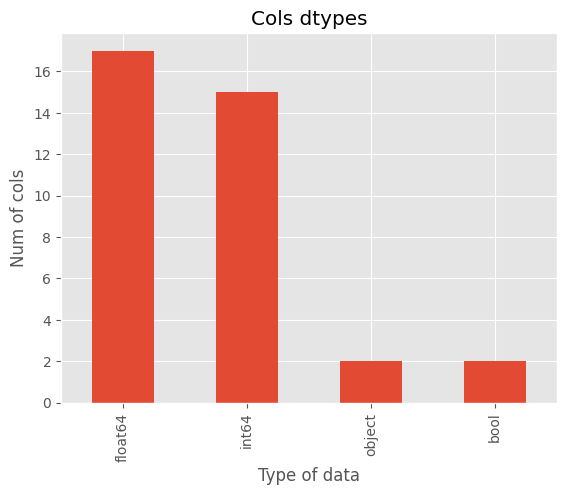

In [5]:
dtypes.value_counts().plot(kind='bar')
plt.title('Cols dtypes')
plt.xlabel('Type of data')
plt.ylabel('Num of cols')
plt.show()

Описательная статистика набора данных

In [6]:
data.describe()

price_doc      full_sq      life_sq        floor    max_floor  \
count  8.894000e+03  8894.000000  8894.000000  8894.000000  8894.000000   
mean   7.807093e+06    51.724196    30.417248     6.733303    12.186755   
std    5.024875e+06    20.039067    13.506626     4.800781     5.639183   
min    1.000000e+05    12.000000     0.000000     0.000000     1.000000   
25%    5.450861e+06    38.000000    19.000000     3.000000     9.000000   
50%    6.950000e+06    45.000000    29.000000     5.000000    12.000000   
75%    9.200000e+06    60.000000    38.000000     9.000000    16.000000   
max    8.077744e+07   275.000000   232.000000    77.000000    57.000000   

        build_year     num_room     kitch_sq        area_m  green_zone_part  \
count  8859.000000  8894.000000  8894.000000  8.894000e+03      8894.000000   
mean   1974.139745     1.952665     7.716101  1.108296e+07         0.189023   
std     115.094557     0.862990     2.818154  1.051812e+07         0.161092   
min       0.000000     0.000000     0.000000  2.081628e+06         0.001879   
25%    1966.000000     1.000000     6.000000  5.686537e+06         0.063755   
50%    1976.000000     2.000000     8.000000  8.464344e+06         0.133373   
75%    1995.000000     3.000000     9.000000  1.249544e+07         0.300284   
max    4965.000000    17.000000    57.000000  2.060718e+08         0.852923   

       indust_part    preschool       school   healthcare     shopping  \
count  8894.000000  8894.000000  8894.000000  8894.000000  8894.000000   
mean      0.127519     5.095120     5.946256     1.743423     4.862941   
std       0.122523     2.649712     3.015129     1.511100     4.105298   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.033494     4.000000     4.000000     1.000000     2.000000   
50%       0.090799     5.000000     6.000000     1.000000     4.000000   
75%       0.194489     6.000000     7.000000     3.000000     6.000000   
max       0.521867    13.000000    14.000000     6.000000    23.000000   

            office         young           work         elder       0_6_age  \
count  8894.000000   8894.000000    8894.000000   8894.000000   8894.000000   
mean      7.382617  14133.977625   69035.969080  24949.562064   6506.230155   
std      16.671204   7499.271182   31818.820787  10869.045111   3469.111148   
min       0.000000    365.000000    1633.000000    548.000000    175.000000   
25%       1.000000   9647.000000   49242.000000  17508.000000   4533.000000   
50%       3.000000  12842.000000   65499.000000  25045.000000   5797.000000   
75%       6.000000  16719.000000   91795.000000  31147.000000   7753.000000   
max     141.000000  40692.000000  161290.000000  57086.000000  19223.000000   

           7_14_age  metro_min_avto  metro_km_avto  metro_min_walk  \
count   8894.000000     8894.000000    8894.000000     8883.000000   
mean    6760.512368        3.878726       2.776304       31.475028   
std     3607.526395        5.486074       4.725993       54.975459   
min      168.000000        0.000000       0.000000        0.000000   
25%     4625.000000        1.614015       0.935593        9.904819   
50%     5992.000000        2.380537       1.456320       16.265692   
75%     7976.000000        3.601120       2.285696       25.876968   
max    19083.000000       60.941737      74.579620      711.215806   

       metro_km_walk      mkad_km   kremlin_km  green_part_1000  \
count    8883.000000  8894.000000  8894.000000      8894.000000   
mean        2.622919     5.531550    13.630503        14.796778   
std         4.581288     4.445240     7.044961        12.579365   
min         0.000000     0.093326     0.072897         0.000000   
25%         0.825402     2.315584     9.296152         5.440000   
50%         1.355474     4.402202    12.890028        10.630000   
75%         2.156414     7.598405    15.808401        21.547500   
max        59.267984    53.277832    70.738769       100.000000   

       p

- __count:__ количество не NaN значений в каждом столбце.
- __mean:__ среднее арифметическое.
- __std:__ стандартное отклонение, показывающее, насколько значения варьируются относительно среднего.
- __min:__ минимальное значение.
- __25%:__ 25-й перцентиль (первый квартиль), ниже которого находится 25% данных.
- __50%:__ медиана (50-й перцентиль).
- __75%:__ 75-й перцентиль (третий квартиль), ниже которого находится 75% данных.
- __max:__ максимальное значение.

Статистическая сводка только для столбцов с категориальными или строковыми данными 

In [7]:
data.describe(include='O')

material sub_area
count      8894     8894
unique        5      144
top       panel  Mar'ino
freq       5563      238

- __count:__ Количество не NaN значений в каждом столбце.
- __unique:__ Количество уникальных значений в столбце.
- __top:__ Самое часто встречающееся значение (мода) в столбце.
- __freq:__ Частота (количество) появления самого популярного значения (top).

#### Если значение max_floor = 57, значит, кто-то живет на 77-м этаже.
#### Уберем эти значения.

In [8]:
data.drop(data[data["floor"] > data["max_floor"]].index,inplace=True)

# 2. Обработка значений и подготовка ДАННЫХ для анализа и моделирования.

## 2.1 Обработка NaN значений.

In [9]:
data_nan = pd.DataFrame(data.isna().sum(), columns=["Count NaN values"])
data_nan = data_nan[data_nan["Count NaN values"] > 0]

display(data_nan)

Count NaN values
build_year                    35
metro_min_walk                11
metro_km_walk                 11

#### Найдем выбросы или неправильные значения

In [10]:
data['build_year'].describe().reset_index()

index   build_year
0  count  8823.000000
1   mean  1974.133401
2    std   115.324932
3    min     0.000000
4    25%  1966.000000
5    50%  1976.000000
6    75%  1995.000000
7    max  4965.000000

#### Заметим наличие ошибок и некорректных данных для этого столбца:

- Минимальное значение равно нулю
- Максимальное значение равно 4965
- Ненулевое число пропущенных значений

### 2.1.1 Пропущенные значения в столбце build_year(год постройки)

#### Посмтрим на распределение данных

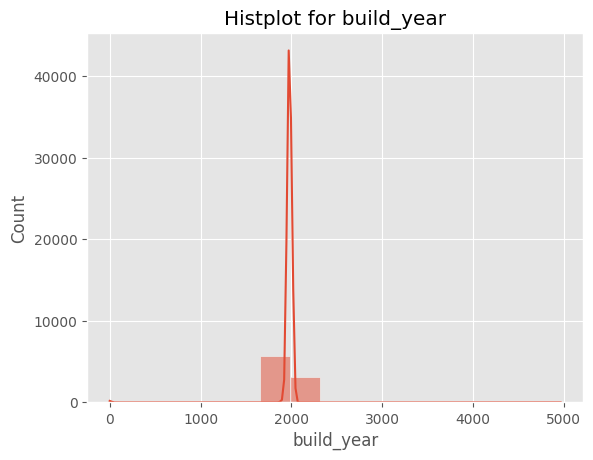

In [11]:
sns.histplot(data['build_year'], kde=True,bins = 15)
plt.title("Histplot for build_year")
plt.show()

Эти ошибоки сильно влияют как на восприятие, так и на перспективы нашей работы.

Чтобы решить эту проблему:
- Мы определим минимальный год постройки, основываясь на материале строительства;
- Значения ниже и выше этих ограничений будут заменены на среднее значение года постройки по материалу;
- Использование квантилей в данном случае будет не совсем корректным — мы потеряем достоверные данные, находящиеся ниже квантиля.

#### Посмотрим на эти "неверные" значения

In [12]:
data[['build_year','material']].sort_values(by='build_year').head(30)

build_year                  material
1302         0.0                     panel
7413         0.0                     panel
1633         0.0                     panel
868          0.0                     panel
6397         0.0                     panel
4012         1.0                     panel
8289         1.0                     panel
4550         1.0                     panel
5823         1.0             mass concrete
3109         1.0               breezeblock
1308         1.0                     panel
4906         1.0                     panel
4929         1.0                     panel
5003         1.0                     panel
5657         1.0                     panel
986          1.0             mass concrete
4370         1.0                     panel
6974         1.0                     panel
3613         1.0                     panel
4020         1.0                     panel
8375         1.0                     panel
1925         1.0                     panel
4129         1.0                     panel
2281         1.0  mass concrete plus brick
4291         1.0                     brick
1996         1.0                     panel
360          1.0                     panel
8329      1691.0               breezeblock
433       1860.0                     panel
2547      1876.0                     brick

#### Создадим функцию для корректировки набора данных в зависимости от года постройки

In [13]:
def right_year(lower_year,upper_year,material):

    f1 = data['material'] == material # First filter
    f2 = (data['build_year'] >= lower_year) & (data['build_year'] <= upper_year)
    real_data = data[f1 & f2]

    mean_val = round(real_data['build_year'].mean())
    # Замена значений выше и ниже пороговых значений средними значениями за год постройки среди других зданий с использованием этого материала.
    data.loc[data['material'] == material,'build_year'] = data['build_year'].apply(lambda x: mean_val if (x < lower_year or x > upper_year or pd.isna(x)) else x)

- Первый панельный дом в СССР был построен после войны в 1948 году в Москве.
- Впервые крупные шлакоблоки в России начали использовать в 1927 году.
- Использование цемента началось очень давно, поэтому здания, имеющие меньшие значения, чем нормальные минимальные значения, мы заменим на средние значения, основанные на имеющихся данных,
    - Нижнюю границу выберем вручную из отсортированной по году выборки.
- Использование кирпича также началось слишком давно, чтобы здания могли иметь меньшие значения, чем нормальные минимальные значения, поэтому мы заменим их средними значениями на основе имеющихся данных,
    - Нижнюю границу выберем вручную из отсортированной по году выборки.

__Панельные дома__

In [14]:
right_year(1948,2023,'panel')

__Дома из шлакоблока__

In [15]:
right_year(1927,2023,'breezeblock')

__Бетонные дома__

In [16]:
right_year(1965,2023,'mass concrete')

__Дома из бетона и кирпича__

In [17]:
right_year(1967,2023,'mass concrete plus brick')

__Крипичные дома__

In [18]:
right_year(1876,2023,'brick')

#### Теперь мы должны получить корректные данные.

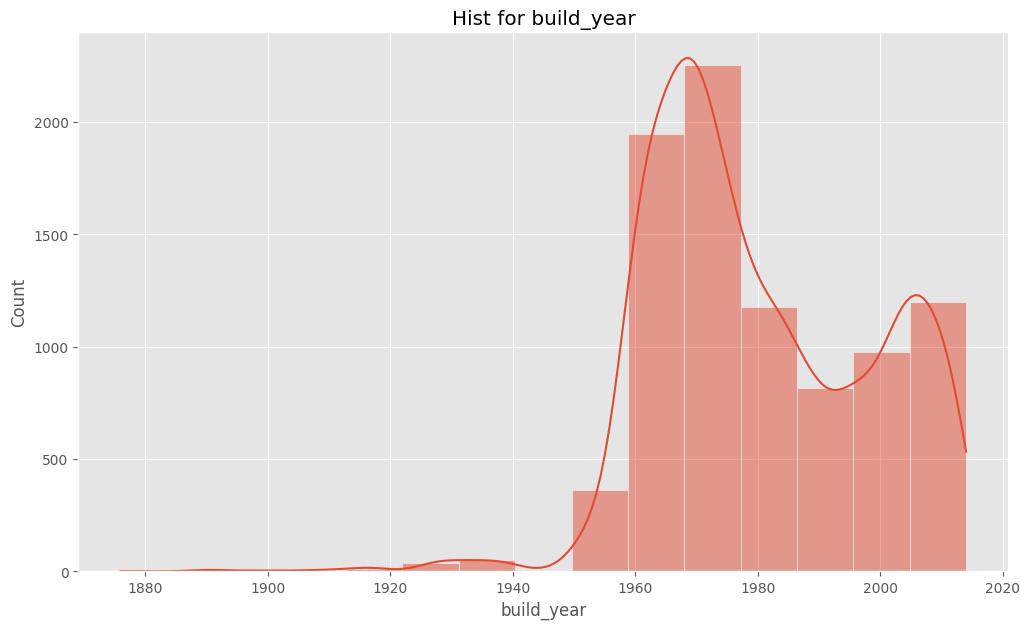

In [19]:
plt.figure(figsize=(12, 7))
sns.histplot(data['build_year'], kde=True,bins = 15)
plt.title("Hist for build_year")
plt.show()

#### Заменим год постройки на возраст здания, чтобы правильно использовать его в наших регрессионных моделях

In [20]:
data['age'] = 2023 - data['build_year']
data.drop(columns=['build_year'], inplace=True)

__Гистограмма должна быть полностью симметрична прошлой__

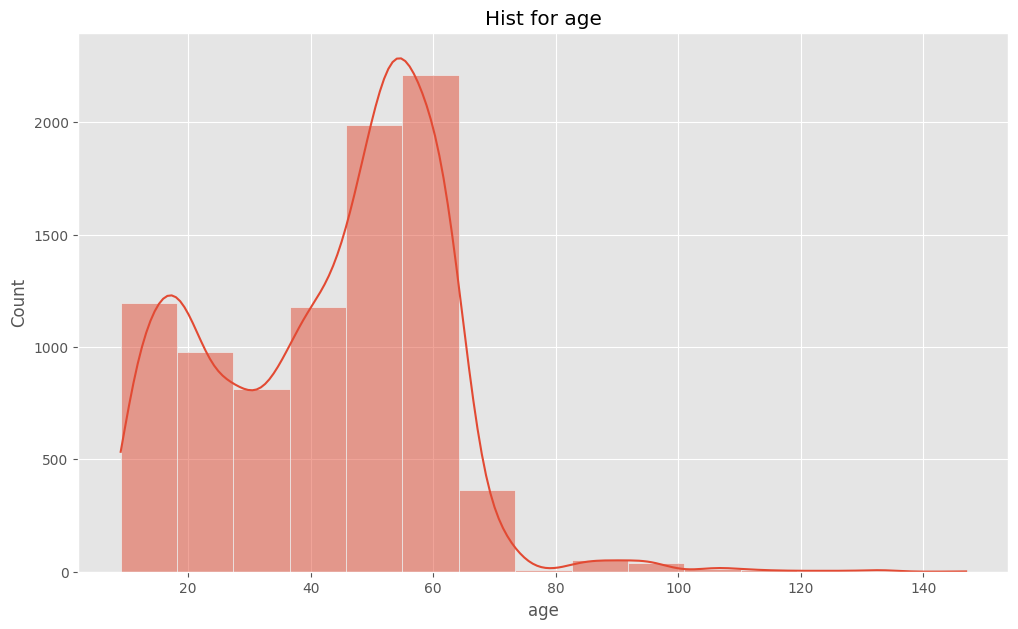

In [21]:
plt.figure(figsize=(12, 7))
sns.histplot(data['age'], kde=True,bins = 15)
plt.title("Hist for age")
plt.show()

### 2.1.2 Обработка пропущенных значений, относящихся к признакам, связанным с метро 

#### Заменяем "NaN" на медианные значения в данных 

In [22]:
data['metro_min_walk'] = data.groupby('sub_area')['metro_min_walk'].transform('median')
data['metro_km_walk'] = data.groupby('sub_area')['metro_km_walk'].transform('median')

#### Создаем еще один df для поиска NaN значений

In [23]:
data_nan = pd.DataFrame(data.isna().sum(), columns=["Num_of_NaN_value"])
data_nan = data_nan[data_nan["Num_of_NaN_value"] > 0]

display(data_nan)

Empty DataFrame
Columns: [Num_of_NaN_value]
Index: []

#### __Обработка прошла успешно.__

# 3. Визуализация

## 3.1 Одномерный анализ данных.

In [24]:
numeric_cols = data.select_dtypes(include=['int', 'float', 'bool'])

In [25]:
numeric_cols.head()

price_doc  full_sq  life_sq  floor  max_floor  num_room  kitch_sq  \
0    5150000       38     18.0    1.0       14.0       1.0       9.0   
1    5980000       41     17.0   14.0       16.0       1.0      10.0   
2    4600000       41     20.0   11.0       14.0       1.0       8.0   
3    5650000       38     19.0    6.0       17.0       1.0       8.0   
4    9300000       58     37.0    3.0        9.0       3.0       6.0   

         area_m  green_zone_part  indust_part  preschool  school  healthcare  \
0  7.126815e+06         0.125882     0.458174          4       4           1   
1  2.641243e+06         0.015900     0.051942          2       2           2   
2  1.084231e+07         0.062172     0.161532          6       6           2   
3  7.587523e+06         0.398794     0.000000          6       6           0   
4  4.395333e+06         0.063755     0.038693          4       4           2   

   shopping  office  radiation  detention  young   work  elder  0_6_age  \
0         5       1      False      False   9604  61600  16509     4533   
1         0       7      False      False   8583  35405  14007     4119   
2         4       1      False      False  12194  58114  14911     5767   
3         5       0       True      False  12551  69792  20247     6273   
4         5       1       True      False  13523  56908  24130     6120   

   7_14_age  metro_min_avto  metro_km_avto  metro_min_walk  metro_km_walk  \
0      4439        3.804244       2.563223       40.046916       3.337243   
1      4017        1.721190       0.705344       14.626869       1.218906   
2      5648       29.929680      23.241906      258.622955      21.551913   
3      5562        3.330545       1.173805       11.810772       0.984231   
4      6533        0.584636       0.454650       10.592667       0.882722   

     mkad_km  kremlin_km  green_part_1000  prom_part_1000  office_count_1000  \
0   2.442781   14.856442            17.16           10.33                  2   
1  11.528984    5.323699             0.90           39.48                 17   
2  20.828299   38.988909             7.54            6.64                  0   
3   2.885041   14.921056            24.97            0.00                  0   
4   1.920884   11.812614             3.46            5.41                  0   

   trc_count_1000  leisure_count_1000   age  
0               4                   0  52.0  
1               3                   0  45.0  
2               2                   0  34.0  
3               5                   0  37.0  
4               4                   4  55.0

#### Построим гистограмму, чтобы посмотреть на распределение Y

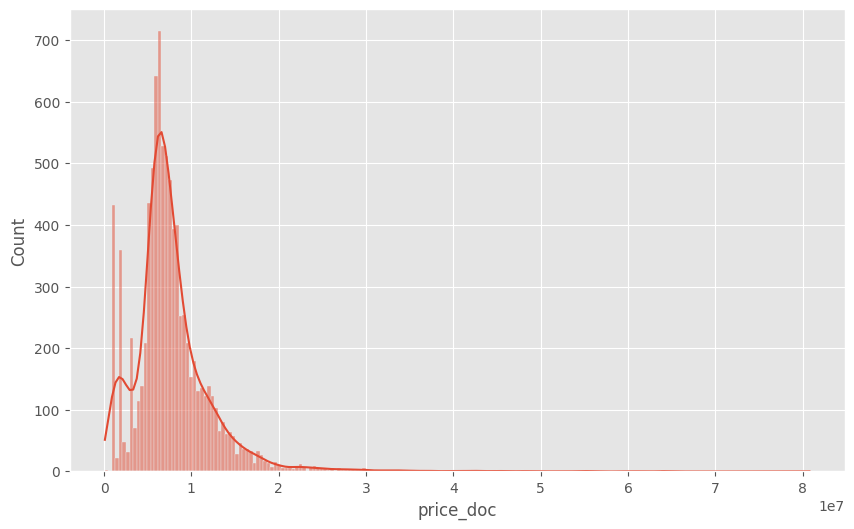

In [26]:
plt.figure(figsize=(10, 6))
sns.histplot(numeric_cols['price_doc'], kde=True,bins = 200)
plt.show()

#### Посмотрим на коэффициент асимметрии распределения значений в столбце price_doc DataFrame numeric_cols

In [27]:
numeric_cols['price_doc'].skew()

3.5093394758544054

#### По графику и коэффициенту асимметрии видно, что распределение имеет правостороннюю асимметрию.
#### Попробуем определить значения выбросов.

In [28]:
data.loc[data['price_doc'] < 4000000,'price_doc'].mode()

0    2000000
Name: price_doc, dtype: int64

In [29]:
(data['price_doc'] < 4000000).sum()

1219

#### Поскольку мы не знаем, почему так много квартир стоимостью 2 млн. руб. , мы отбросим их как ошибки

In [30]:
data = data[data.price_doc > 2000000]

#### Посмотрим на распределение еще раз

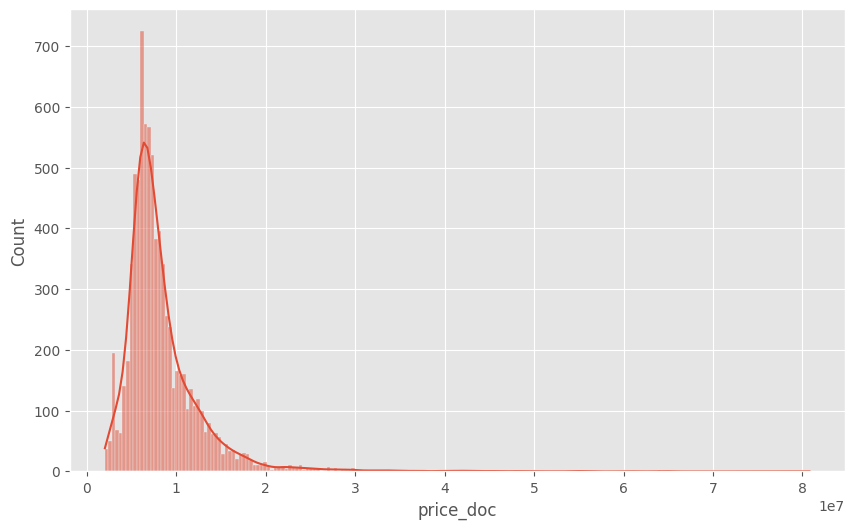

In [31]:
plt.figure(figsize=(10, 6))
sns.histplot(data['price_doc'], kde=True,bins = 200)
plt.show()

#### Выполним фильтрацию выбросов в данных, используя метод межквартильного размаха (IQR — Interquartile Range)

In [32]:
Q1 = data['price_doc'].quantile(0.05)
Q3 = data['price_doc'].quantile(0.95)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data = data[(data['price_doc'] >= lower_bound) & (data['price_doc'] <= upper_bound)]

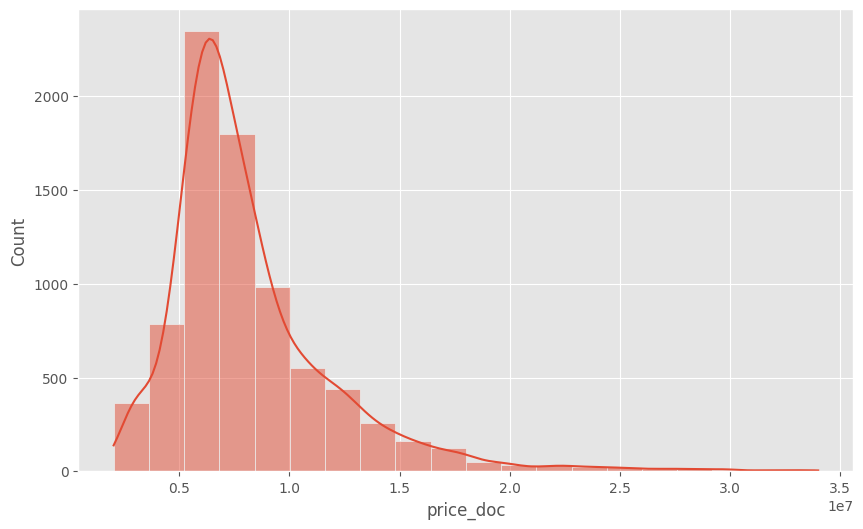

In [33]:
plt.figure(figsize=(10, 6))
sns.histplot(data['price_doc'], kde=True,bins = 20)
plt.show()

#### Получили более или менее нормальное распределение

## 3.2 Многомерный анализ данных.

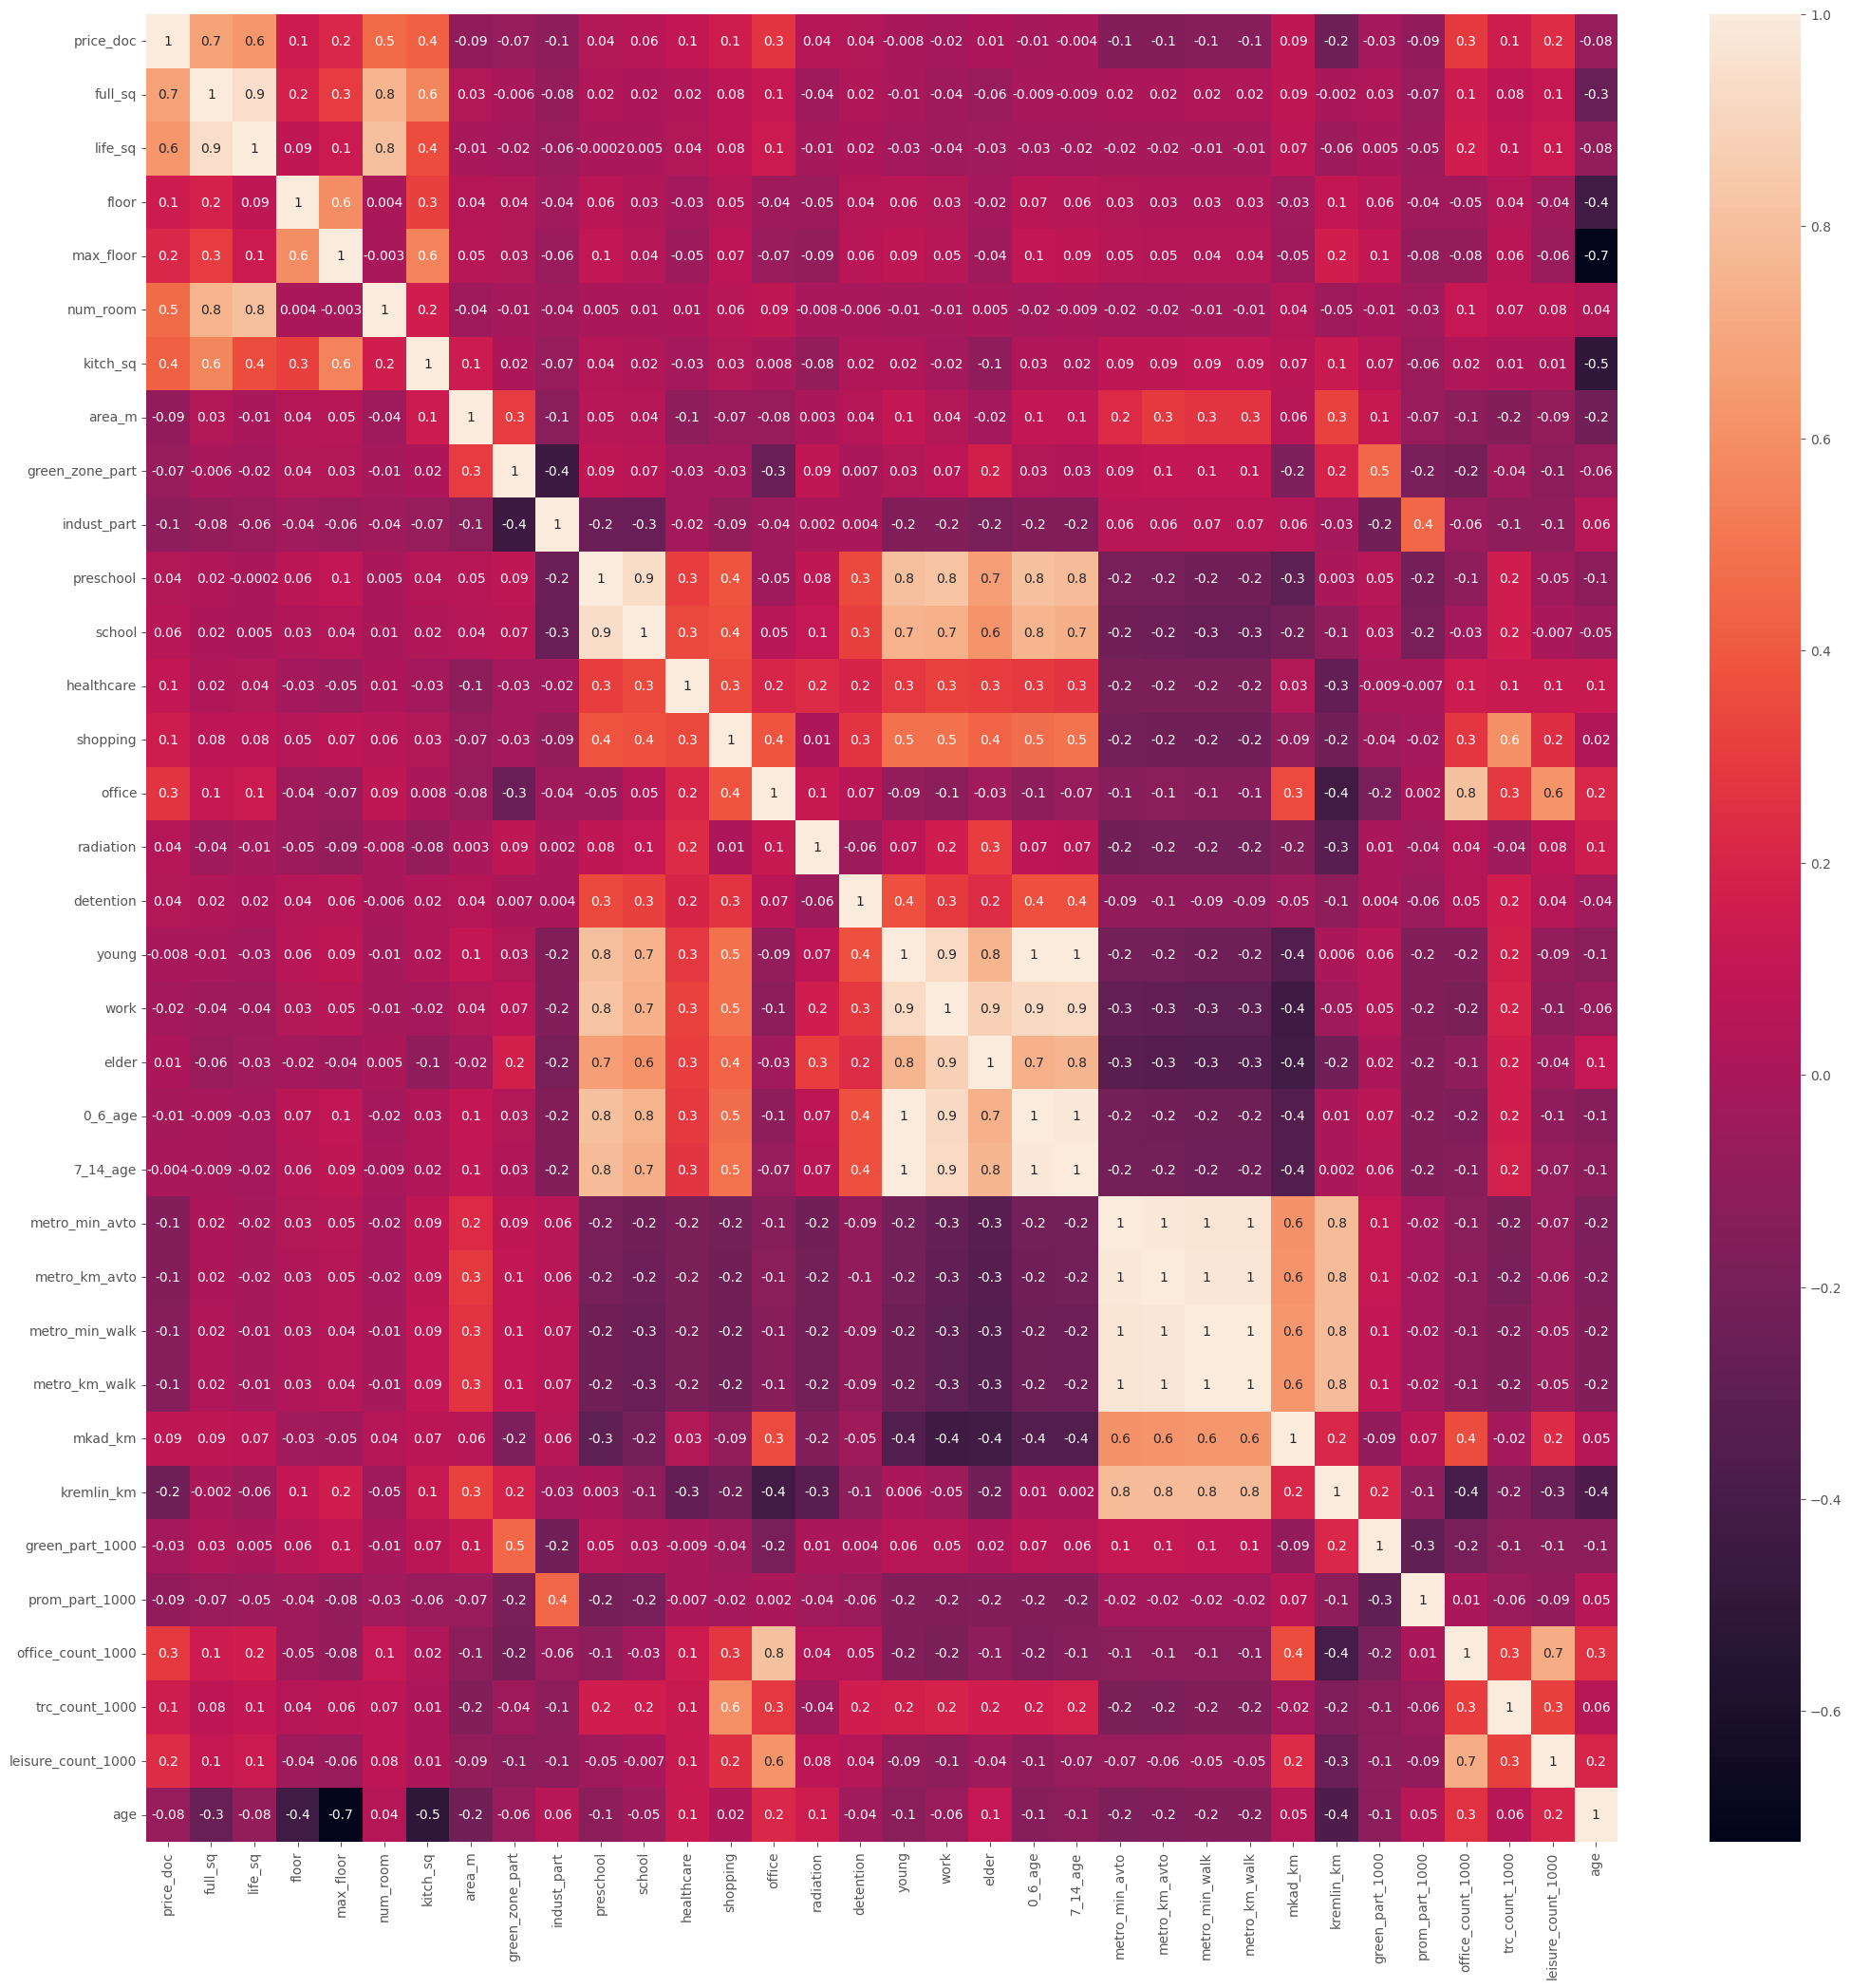

In [34]:
plt.figure(figsize=(25, 25))
sns.heatmap(numeric_cols.corr(),annot = True, fmt='.1g')
plt.show()

#### Промежуточные выводы: Наибольшая корреляция с результирующей характеристикой ['price_doc'] показана признакми:

- __full_sq__ - площадь квартиры и соотносящиеся с ней life_sq и kitchen_sq
- __office__ - количество офисов в этом районе.

#### Выполним анализ корреляции между столбцами данных, отобразим тепловую карту и выведем коэффициент корреляции Пирсона для каждого столбца с price_doc

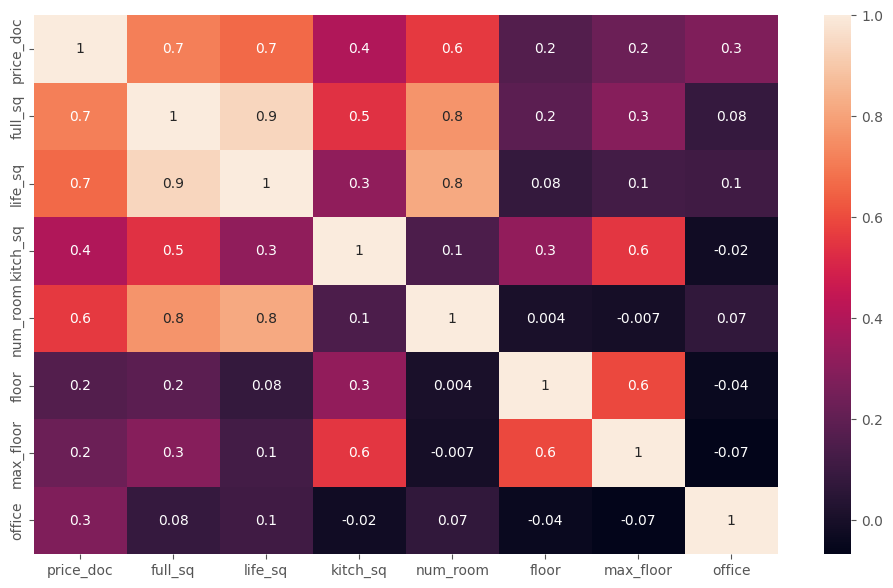

price_doc:PearsonRResult(statistic=1.0, pvalue=0.0)
full_sq:PearsonRResult(statistic=0.715074475175546, pvalue=0.0)
life_sq:PearsonRResult(statistic=0.6625808281442827, pvalue=0.0)
kitch_sq:PearsonRResult(statistic=0.39577627219372224, pvalue=7.739351157938989e-299)
num_room:PearsonRResult(statistic=0.5585134342396911, pvalue=0.0)
floor:PearsonRResult(statistic=0.16483990707063395, pvalue=6.182621254983797e-50)
max_floor:PearsonRResult(statistic=0.2285423004522118, pvalue=1.721482464478581e-95)
office:PearsonRResult(statistic=0.27504494971175597, pvalue=4.140901983459192e-139)


In [35]:
cor_list_1 = ['price_doc','full_sq','life_sq','kitch_sq','num_room','floor','max_floor','office']

plt.figure(figsize=(12, 7))
sns.heatmap(data[cor_list_1].corr(),annot = True, fmt='.1g')
plt.show()

for i in cor_list_1:
    print(f"{i}:{pearsonr(data['price_doc'], data[i])}")

__Коэффициент корреляции Пирсона__ — это статистическая мера, которая используется для оценки силы и направления линейной связи между двумя переменными. Он измеряет, насколько сильно изменения одной переменной могут быть предсказаны изменениями другой переменной, если связь между ними линейная.

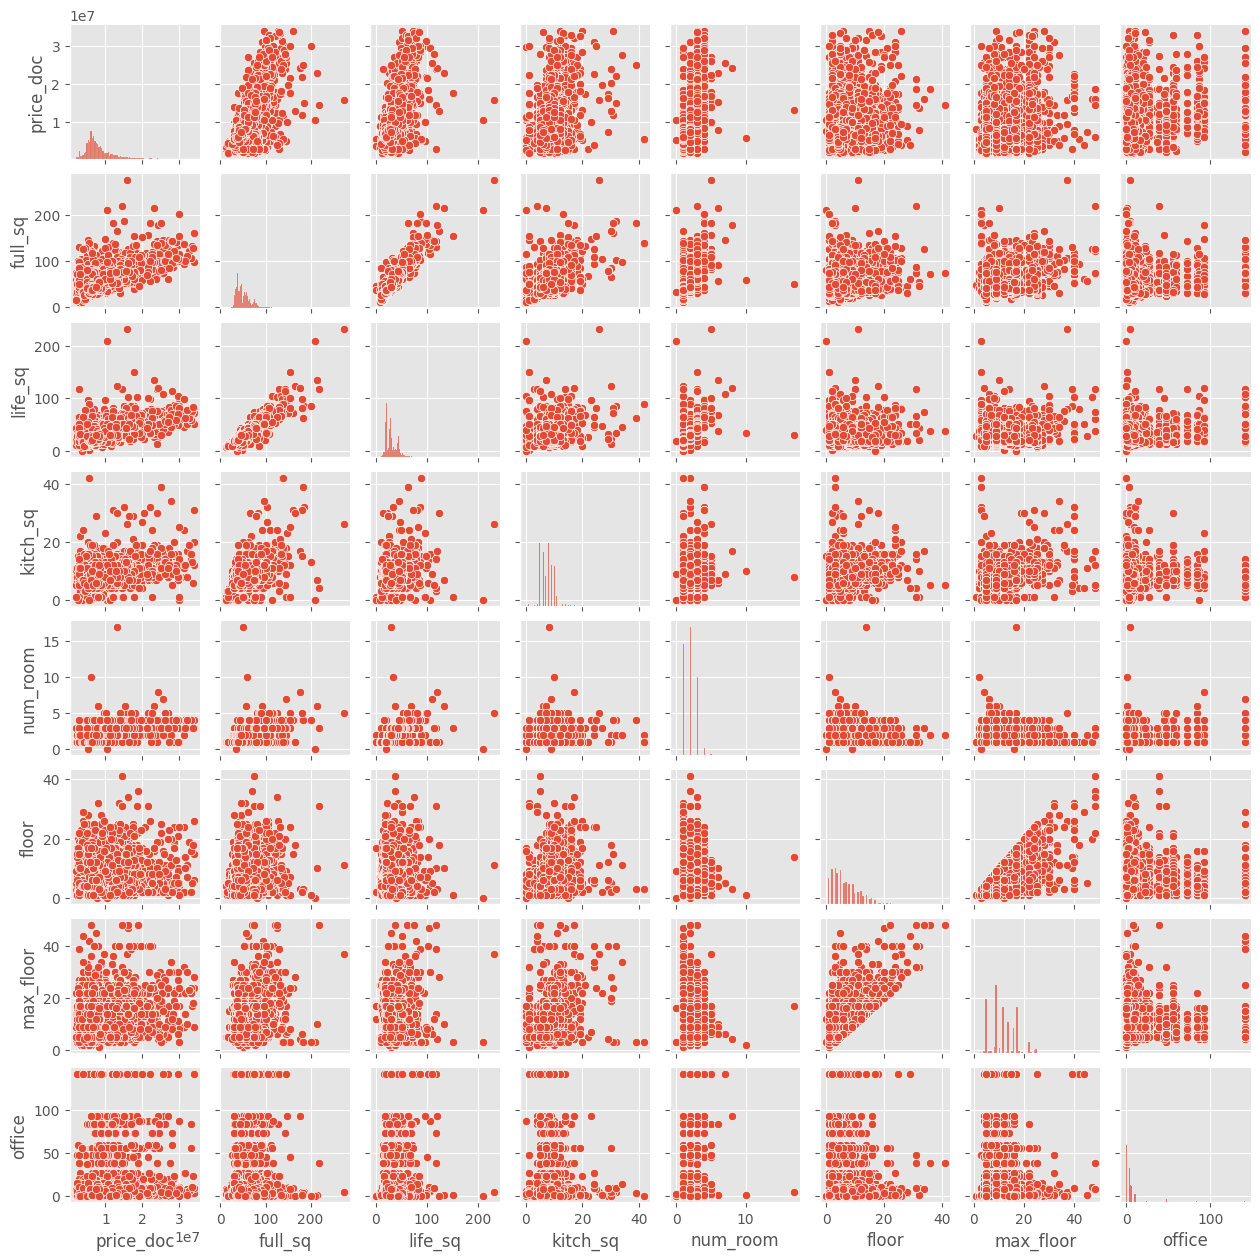

In [36]:
help_data = data[cor_list_1]
sns.pairplot(help_data, height=1.6)

#### Как видно, все выбранные параметры имеют корреляцию с целевой переменной Y, но стоит обратить внимание на переменные num_room, floor/max_floor, life_sq, kitch_sq.

#### Кроме того, следует обратить внимание на сильную взаимосвязь между этими параметрами.

#### В данном случае потребуется выбрать дополнительные параметры, которые могут быть использованы для построения модели.

# 4. Выбор дополительных параметров.

#### Учитывая, что другие параметры в нашем наборе данных имеют взаимную корреляцию, существует основание для создания коэффициента с весами для повышения точности модели.

#### Лучшие идеи:

- Данные о привлекательности района.
- Средняя стоимость за квадратный метр в районе / Средняя стоимость по району. Поскольку использование только стоимости квадратного метра в квартире будет некорректным, при наличии таких данных модель будет излишней.
- Данные о транспортной системе.
- Оценка привлекательности в радиусе 1 км от квартиры.
- Коэффициент качества дома.
- Коэффициент достаточности инфраструктуры.

## 4.1. Данные о привлекательности района

In [37]:
district_cols = ['area_m','green_zone_part','indust_part','preschool','school','healthcare','radiation','detention','young','work','elder','0_6_age','7_14_age','shopping','office']

In [38]:
district_cols_hist = ['area_m','green_zone_part','indust_part','preschool','school','healthcare','young','work','elder','0_6_age','7_14_age','shopping','office']

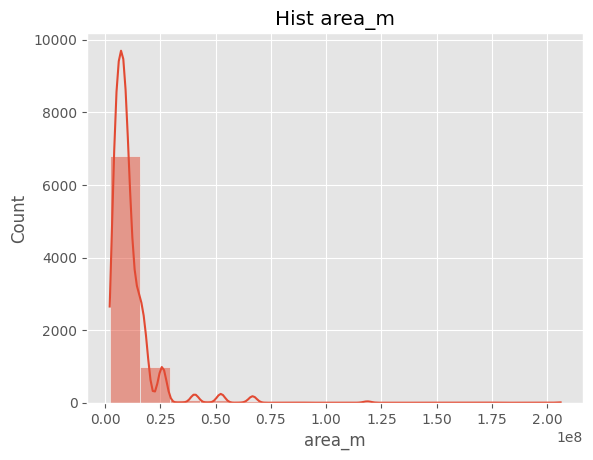

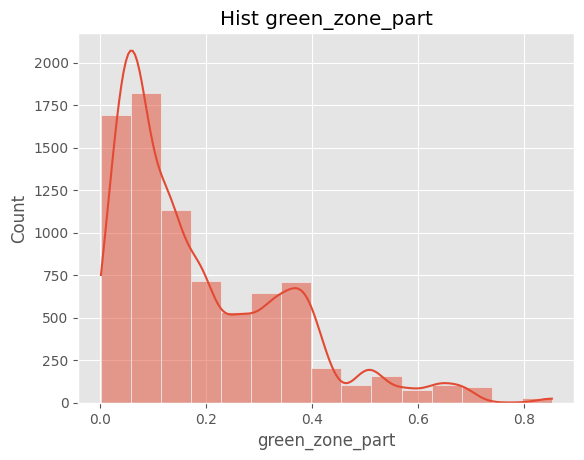

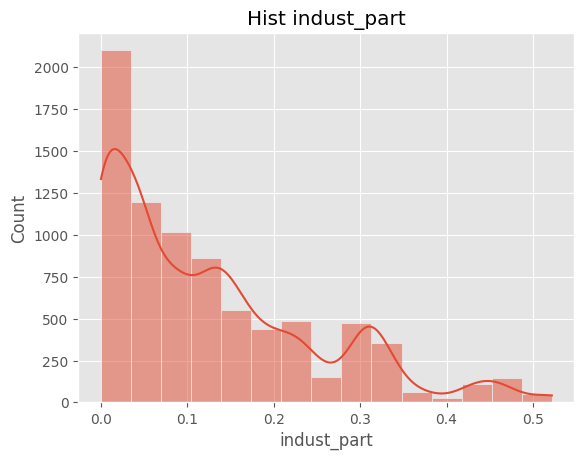

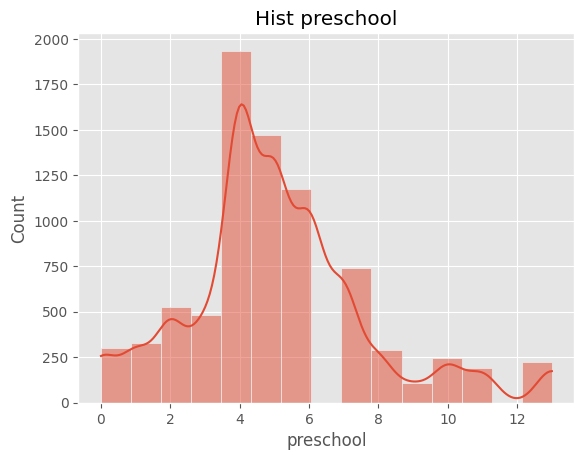

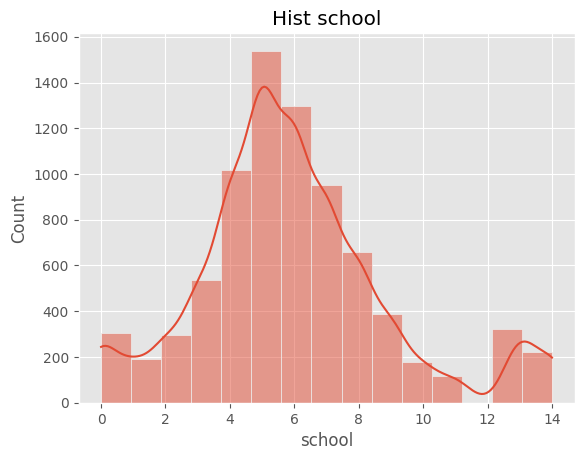

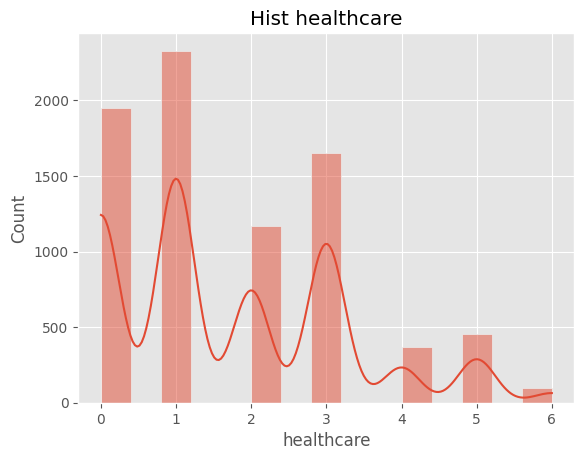

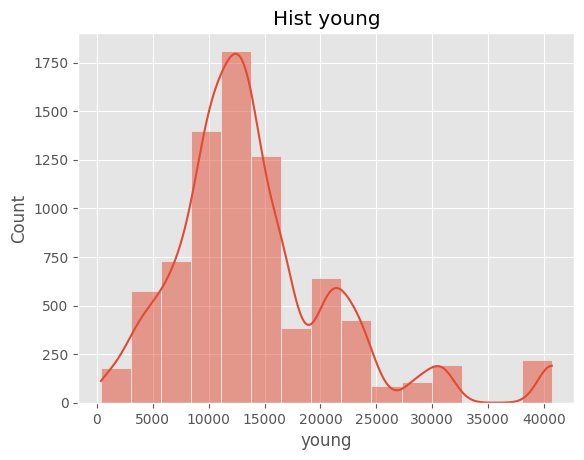

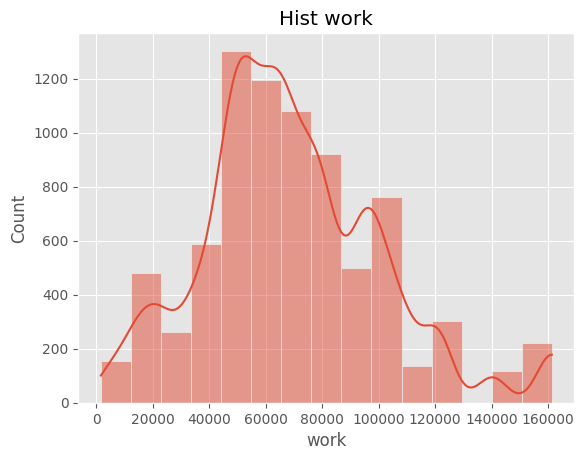

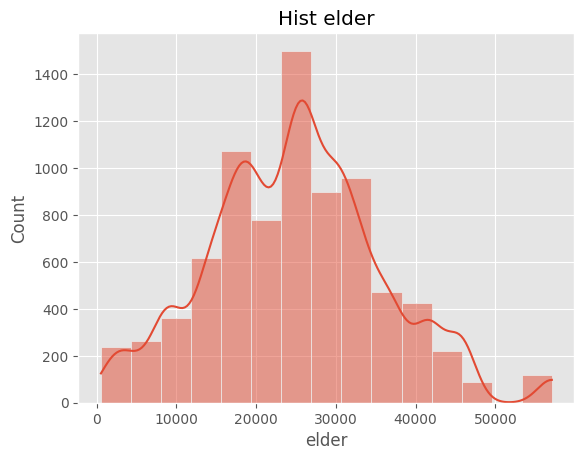

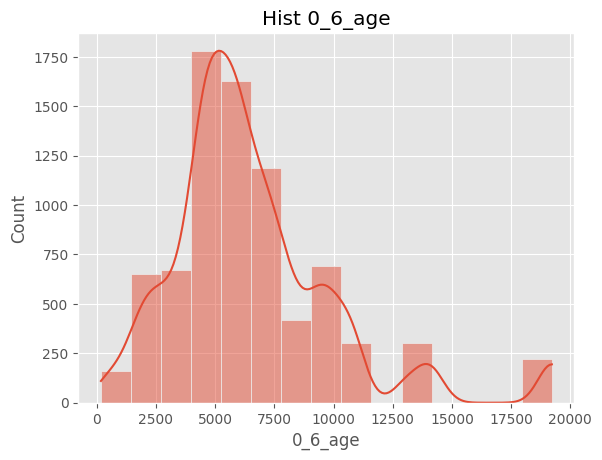

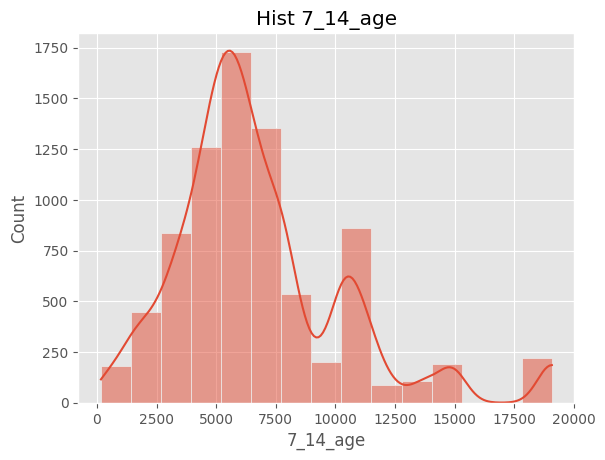

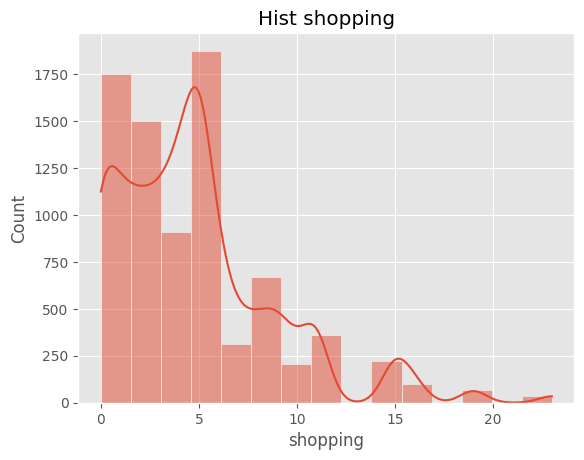

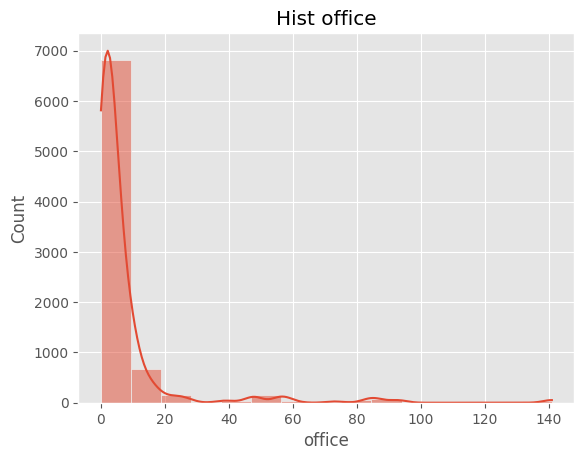

In [39]:
for column in district_cols_hist:
    sns.histplot(data[column], kde=True, bins=15)
    plt.title(f"Hist {column}")
    plt.show()

#### Как видно, не все данные распределены нормально.

#### И при их нормализации значительная часть выборки будет потеряна, и обычные показатели для большинства этих факторов будут утрачены.

#### Тем не менее, некоторые данные следует обрезать с использованием квантилей.

- area_m
- office
- green_zone_part
- indust_part

In [40]:
data.shape[0]

8016

In [41]:
dis_norm = ['area_m','office','green_zone_part','indust_part']

In [42]:
for i in dis_norm:
    Q1 = data[i].quantile(0.05)
    Q3 = data[i].quantile(0.95)

    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    data = data[(data[i] >= lower_bound) & (data[i] <= upper_bound)]

#### Коэффициент корреляции Пирсона 

In [43]:
for i in district_cols:
    print(f"{i}:{pearsonr(data['price_doc'], data[i])}")

area_m:PearsonRResult(statistic=-0.0964128710988553, pvalue=1.63679043374788e-17)
green_zone_part:PearsonRResult(statistic=-0.062013241327941816, pvalue=4.482496183105635e-08)
indust_part:PearsonRResult(statistic=-0.09050139167394511, pvalue=1.321194597541144e-15)
preschool:PearsonRResult(statistic=0.02825969704016625, pvalue=0.012734064554338106)
school:PearsonRResult(statistic=0.05360067691428471, pvalue=2.2740242151374756e-06)
healthcare:PearsonRResult(statistic=0.07145314279508191, pvalue=2.873201091294924e-10)
radiation:PearsonRResult(statistic=0.018685843222656526, pvalue=0.0995598787988026)
detention:PearsonRResult(statistic=0.028995863598197103, pvalue=0.010587031946434124)
young:PearsonRResult(statistic=-0.01357977110041763, pvalue=0.23135065029558272)
work:PearsonRResult(statistic=-0.023385842942247093, pvalue=0.03926906613568571)
elder:PearsonRResult(statistic=0.006667760712581158, pvalue=0.5567611346095535)
0_6_age:PearsonRResult(statistic=-0.011816583076904533, pvalue=0.29

In [44]:
data.shape[0]

7770

#### Как видно из p-значения, только несколько параметров действительно не имеют корреляции с целевой переменной.

#### Исключаем ненужные данные.

#### Также исключаем параметры "preschool", "young", "elder", "children" и "detention", так как они показывают сильную взаимосвязь между собой.

In [45]:
att_cols = ['area_m', 'indust_part', 'school', 'work', 'shopping', 'office']

In [46]:
set1 = set(district_cols)
set2 = set(att_cols)

res = set1 - set2

dis_rem_cols = list(res)

In [47]:
dis_rem_cols

['healthcare',
 'radiation',
 'young',
 'detention',
 'green_zone_part',
 'elder',
 'preschool',
 '7_14_age',
 '0_6_age']

In [48]:
data.drop(columns= dis_rem_cols,inplace = True)

In [49]:
data.shape

(7770, 27)

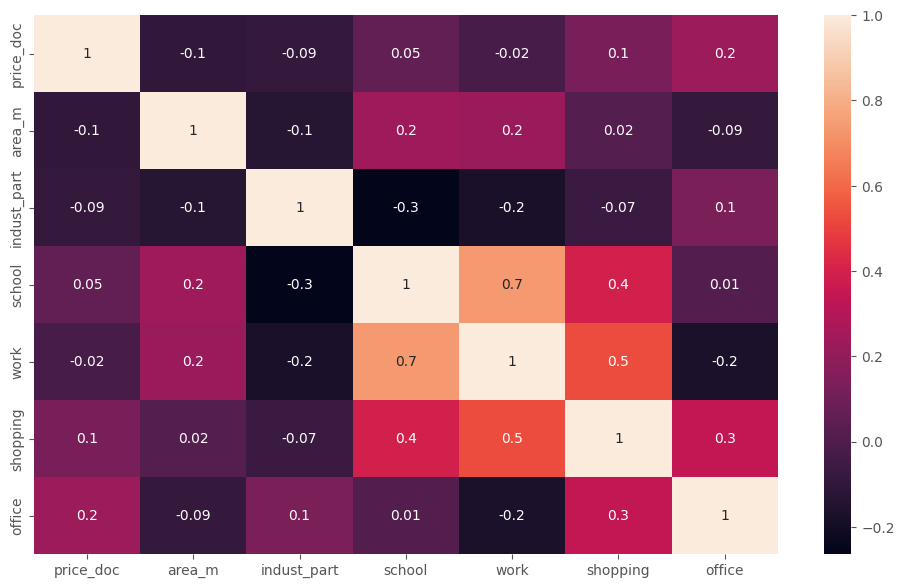

In [50]:
plt.figure(figsize=(12, 7))
sns.heatmap(data[['price_doc',*att_cols]].corr(),annot = True, fmt='.1g')
plt.show()

In [51]:
for i in att_cols:
    print(f"{i}:{pearsonr(data['price_doc'], data[i])}")

area_m:PearsonRResult(statistic=-0.0964128710988553, pvalue=1.63679043374788e-17)
indust_part:PearsonRResult(statistic=-0.09050139167394511, pvalue=1.321194597541144e-15)
school:PearsonRResult(statistic=0.05360067691428471, pvalue=2.2740242151374756e-06)
work:PearsonRResult(statistic=-0.023385842942247093, pvalue=0.03926906613568571)
shopping:PearsonRResult(statistic=0.12180268464294401, pvalue=4.5165251978187354e-27)
office:PearsonRResult(statistic=0.22833090628131164, pvalue=1.9078657818511166e-92)


#### Все признаки привлекательности района важны

## 4.2. Коэффициент привлекательности в радиусе киллометра от квартиры.

In [52]:
km_cols = ['green_part_1000','prom_part_1000','office_count_1000','trc_count_1000','leisure_count_1000']

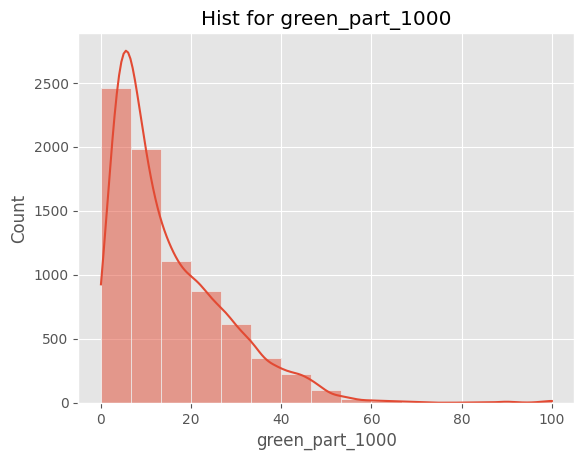

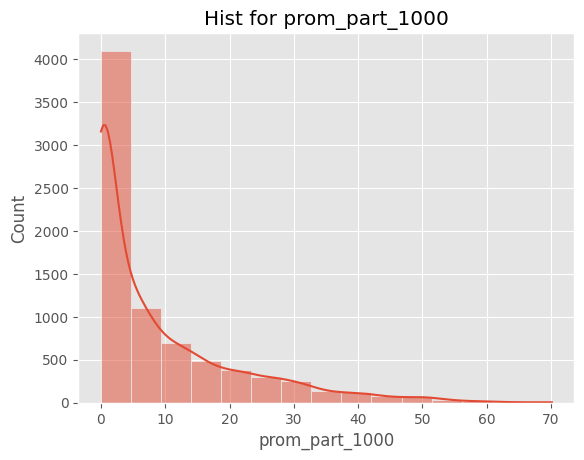

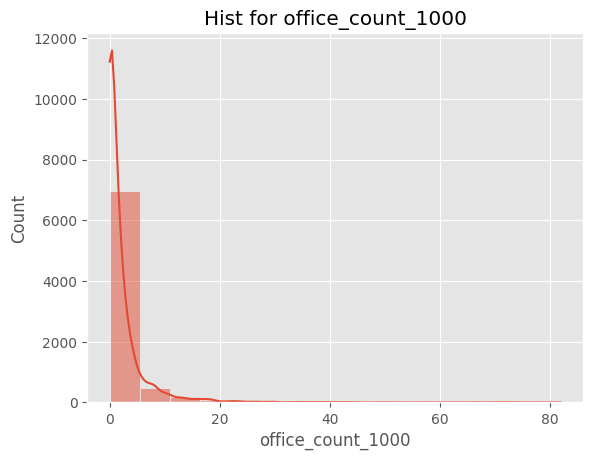

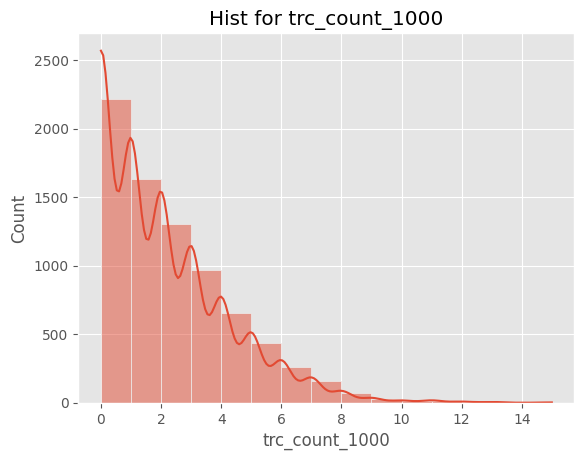

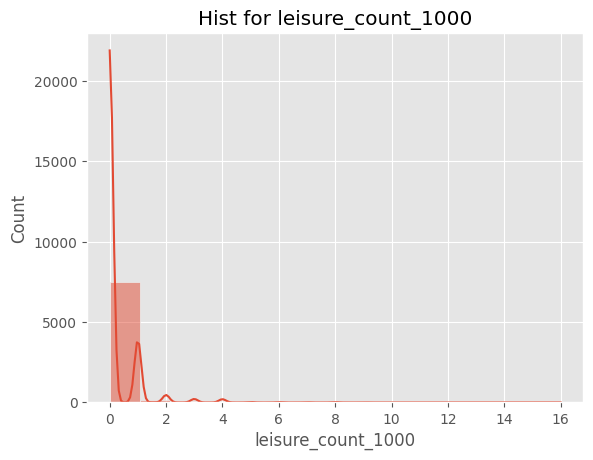

In [53]:
for column in km_cols:
    sns.histplot(data[column], kde=True,bins = 15)
    plt.title(f"Hist for {column}")
    plt.show()

#### Исключение нулевых и противоположных минимальных значений приведет к сокращению выборки и не покажет взаимосвязь между ценой и километровыми радиусами, где нет торговых центров, парков и т.д.

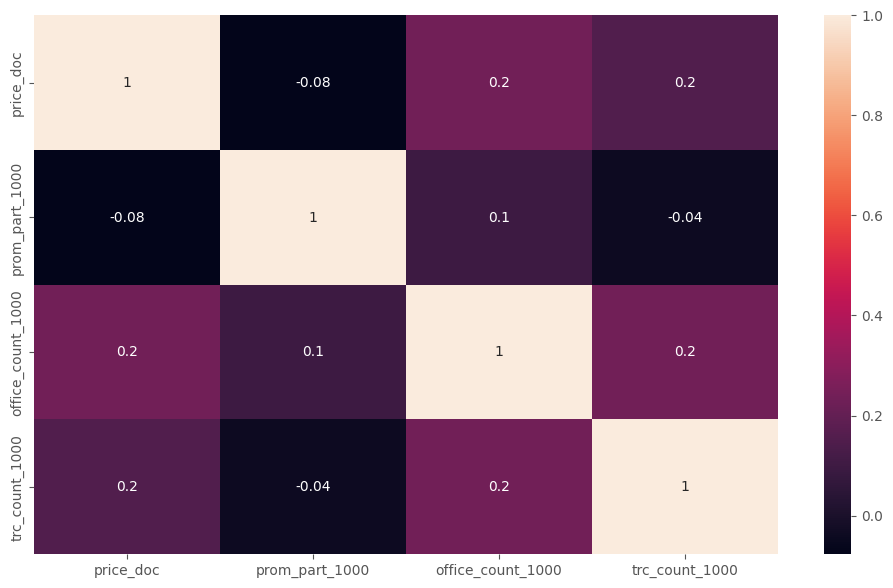

In [54]:
plt.figure(figsize=(12, 7))
sns.heatmap(data[['price_doc','prom_part_1000','office_count_1000','trc_count_1000']].corr(),annot = True, fmt='.1g')
plt.show()

#### Похоже, нам нужно удалить все индикаторы, так как они показывают слишком слабую корреляцию и также коррелируют между собой.
#### Вместо этого мы создадим новый индикатор — коэффициент привлекательности в радиусе километрова от квартиры.

In [55]:
for i in km_cols:
    print(f"{i}:{pearsonr(data['price_doc'], data[i])}")

green_part_1000:PearsonRResult(statistic=-0.030524849471264638, pvalue=0.007126245064874395)
prom_part_1000:PearsonRResult(statistic=-0.07694002725806438, pvalue=1.1131589484751781e-11)
office_count_1000:PearsonRResult(statistic=0.2380233954832836, pvalue=1.5827236218468694e-100)
trc_count_1000:PearsonRResult(statistic=0.1533010690463778, pvalue=4.506509625692478e-42)
leisure_count_1000:PearsonRResult(statistic=0.13371152458075497, pvalue=2.49359755548292e-32)


#### Обучим линйеную регрссию на признаках 'prom_part_1000','trc_count_1000','office_count_1000' и выведем веса и свободный член

In [56]:
df_2 = data.copy()

X = df_2[['prom_part_1000','trc_count_1000','office_count_1000']]
y = df_2['price_doc']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

model_2 = LinearRegression()
model_2.fit(X_scaled, y)

coefficients = model_2.coef_
print(coefficients,'\n')

intercept = model_2.intercept_
print(intercept)

[-357619.31813448  364528.10147001  848215.55706969] 

8165852.267824967


#### Произведем оценку модели линейной регрссии, которую мы только что обучили

In [57]:
X = sm.add_constant(np.array(X_scaled))
est = sm.OLS(y, X)
result = est.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.076
Model:                            OLS   Adj. R-squared:                  0.075
Method:                 Least Squares   F-statistic:                     211.5
Date:                Wed, 20 Nov 2024   Prob (F-statistic):          6.90e-132
Time:                        15:46:51   Log-Likelihood:            -1.2839e+05
No. Observations:                7770   AIC:                         2.568e+05
Df Residuals:                    7766   BIC:                         2.568e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8.166e+06   4.12e+04    198.159      0.0

In [58]:
km_col = ['prom_part_1000','trc_count_1000','office_count_1000']

In [59]:
data['km_score'] = intercept + (coefficients[0] * data[km_col[0]] + coefficients[1] * data[km_col[1]] +\
coefficients[2] * data[km_col[2]])

In [60]:
data.drop(columns= km_cols,inplace = True)

In [61]:
pearsonr(data['price_doc'], data['km_score'])

PearsonRResult(statistic=0.24412694712001948, pvalue=8.282165580145228e-106)

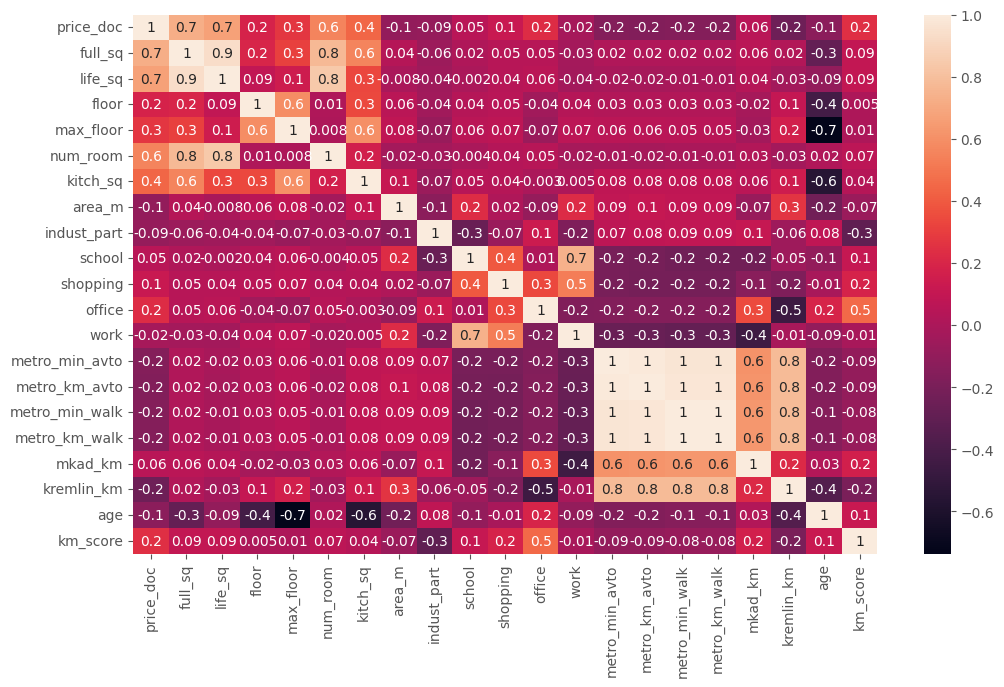

In [62]:
new_numeric_cols = data.select_dtypes(include=['int', 'float', 'bool'])
plt.figure(figsize=(12, 7))
sns.heatmap(new_numeric_cols.corr(),annot = True, fmt='.1g')
plt.show()

## 4.3. Средняя цена квартир на районе

#### Рассчитываем среднюю стоимость квартиры и среднюю площадь, а затем добавим их в качестве признаков.

Группировка по району и расчет средней стоимости

In [63]:
mean_by_distr = data[['sub_area', 'price_doc']].groupby('sub_area').agg('mean')

dict_distr = mean_by_distr['price_doc'].to_dict()

data['mean_distr_price'] = data['sub_area'].map(dict_distr)

Аналогично с площадью

In [64]:
mean_by_distr_sq = data[['sub_area', 'price_doc','full_sq']].groupby('sub_area').agg('mean')

mean_by_distr_sq['mean_price_of_sq'] = round(mean_by_distr_sq['price_doc'] / mean_by_distr_sq['full_sq'],2)

dict_sq = mean_by_distr_sq['mean_price_of_sq'].to_dict()

data['mean_price_sq_by_disc'] = data['sub_area'].map(dict_sq)

mean_by_distr_sq

price_doc    full_sq  mean_price_of_sq
sub_area                                                       
Ajeroport             1.055793e+07  56.288462         187568.30
Akademicheskoe        1.196298e+07  59.266667         201850.06
Alekseevskoe          9.690882e+06  49.441176         196008.33
Altuf'evskoe          7.042593e+06  52.592593         133908.45
Arbat                 1.121000e+07  50.400000         222420.63
...                            ...        ...               ...
Vostochnoe Izmajlovo  6.920088e+06  46.122807         150036.14
Vyhino-Zhulebino      7.247958e+06  49.290598         147045.45
Zapadnoe Degunino     8.020435e+06  53.739130         149247.57
Zjablikovo            7.450000e+06  48.085106         154933.63
Zjuzino               8.760372e+06  50.375000         173903.17

[130 rows x 3 columns]

#### Убираем рудиментарный признак 'sub_area'

In [65]:
data.drop(columns = 'sub_area', inplace=True)

In [66]:
pearsonr(data['price_doc'], data['mean_distr_price'])

PearsonRResult(statistic=0.4910041581486844, pvalue=0.0)

In [67]:
pearsonr(data['price_doc'], data['mean_price_sq_by_disc'])

PearsonRResult(statistic=0.4315191874824696, pvalue=0.0)

#### Нетрудно заметить, что оба показателя являются значимыми и имеют довольно сильную корреляцию с результирующим признаком

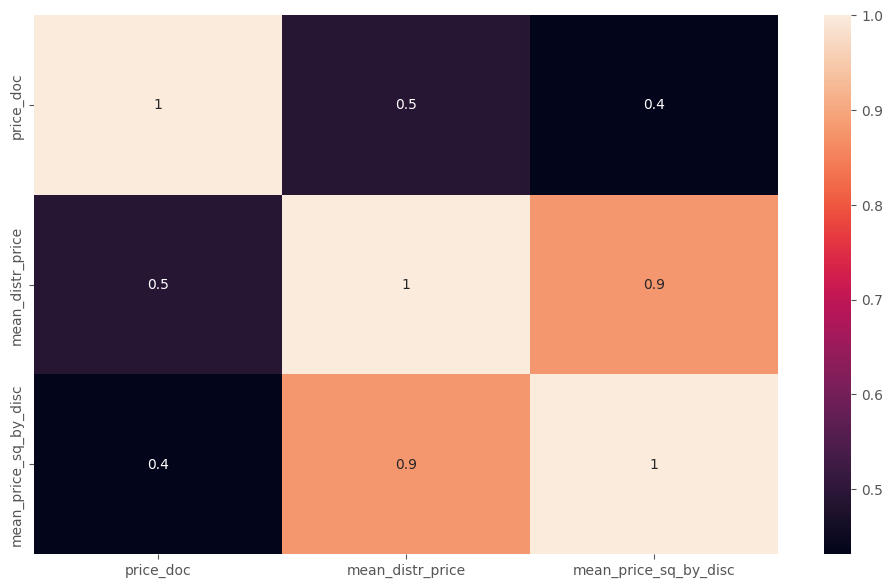

In [68]:
plt.figure(figsize=(12, 7))
sns.heatmap(data[['price_doc','mean_distr_price','mean_price_sq_by_disc']].corr(),annot = True, fmt='.1g')
plt.show()

#### Однако эти признаки имеют сильную корреляцию друг с другом $\boldsymbol \rightarrow$ убираем среднюю цену за квадратный метр, так как корреляция средней цены квартиры в текущем районе выше.

#### Несмотря на вышеуказанное решение, средняя цена за квадратный метр остаётся более полезным признаком, особенно в долгосрочной перспективе. Поэтому, можно пожертвовать немного качеством модели сейчас, оставив этот признак, так как он будет играть ключевую роль в будущем.

In [69]:
data.drop(columns = 'mean_distr_price',inplace = True)

## 4.4. Параметры, относящиеся к транспортной системе.

In [70]:
transp_factors = [ 'metro_km_walk',
 'mkad_km',
 'kremlin_km','metro_min_avto',
 'metro_km_avto',
 'metro_min_walk']

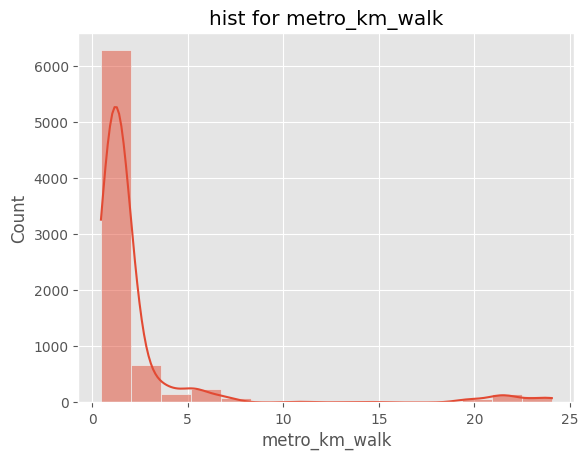

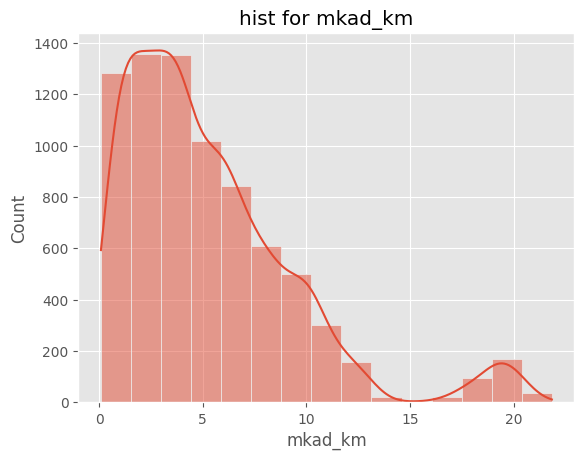

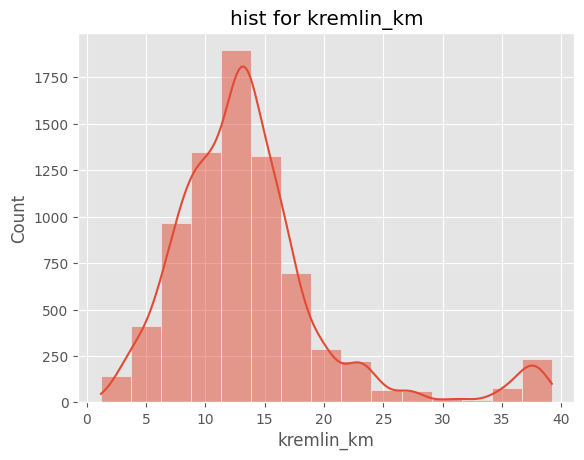

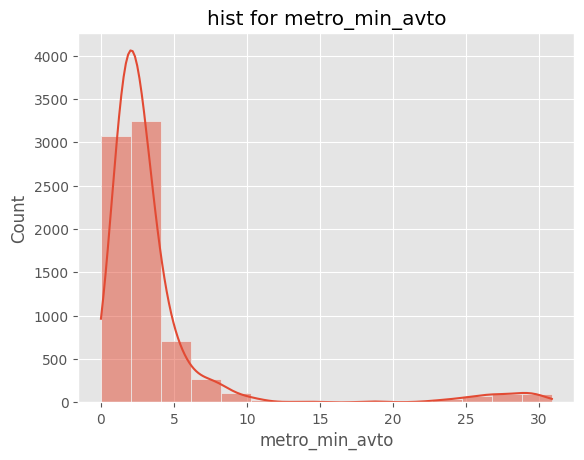

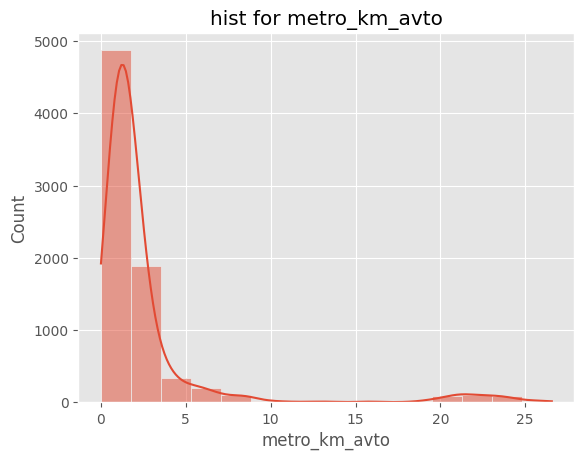

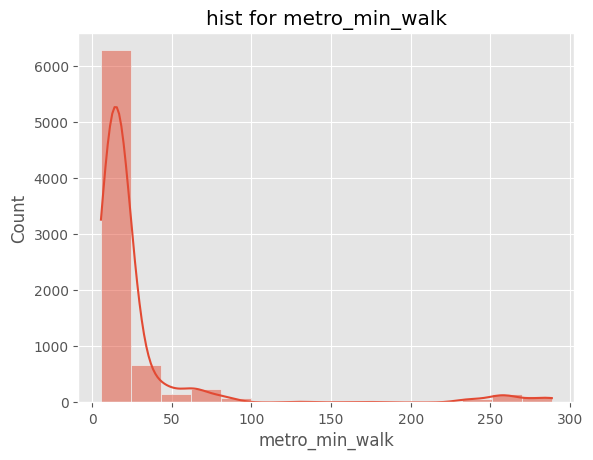

In [71]:
for column in transp_factors:
    sns.histplot(data[column], kde=True,bins = 15)
    plt.title(f"hist for {column}")
    plt.show()

In [72]:
for i in transp_factors:
    print(f'{i}:',pearsonr(data['price_doc'], data[i]))

metro_km_walk: PearsonRResult(statistic=-0.15354740923274715, pvalue=3.330987977003103e-42)
mkad_km: PearsonRResult(statistic=0.05606476228800139, pvalue=7.611695665775025e-07)
kremlin_km: PearsonRResult(statistic=-0.24152999798612576, pvalue=1.5258626145987268e-103)
metro_min_avto: PearsonRResult(statistic=-0.15868024997491026, pvalue=5.465136780143176e-45)
metro_km_avto: PearsonRResult(statistic=-0.16346700294133382, pvalue=1.1334659691593016e-47)
metro_min_walk: PearsonRResult(statistic=-0.1535474092305532, pvalue=3.3309879859780356e-42)


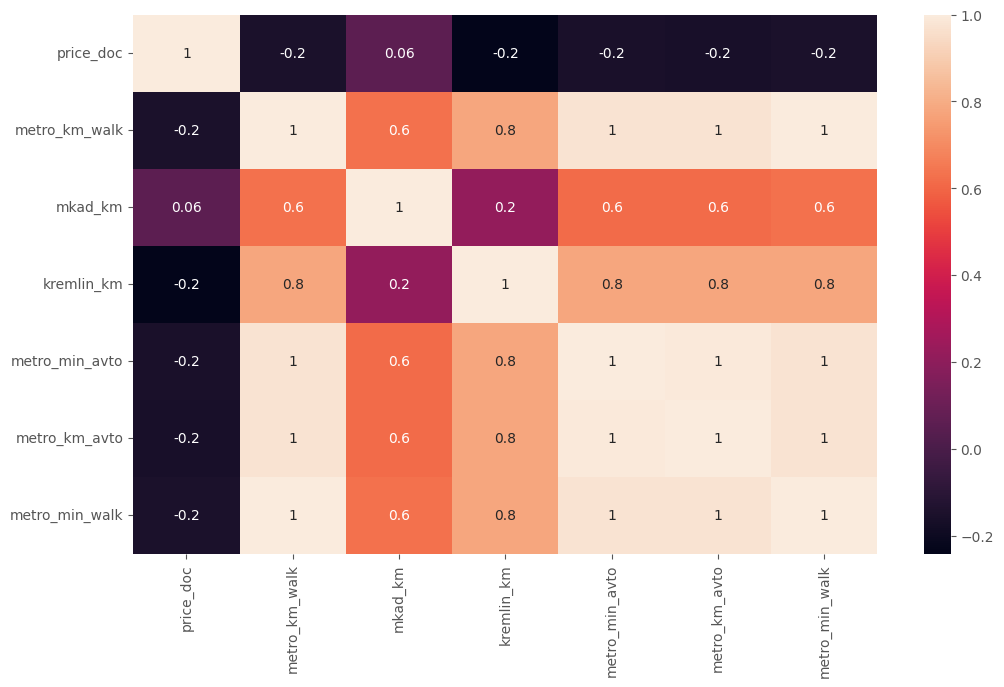

In [73]:
plt.figure(figsize=(12, 7))
sns.heatmap(data[['price_doc',*transp_factors]].corr(),annot = True, fmt='.1g')
plt.show()

#### Факторы сильно коррелируют друг с другом, поэтому стоит исключить большинство из них. При этом показатели расстояния от МКАД и Кремля чётко отражают местоположение квартиры.

In [74]:
tr_remove = [
 'metro_min_avto',
 'metro_km_avto',
 'metro_min_walk',
 'mkad_km',
 'metro_km_walk']

In [75]:
tr_stay = ['kremlin_km']

In [76]:
for i in tr_stay:
    Q1 = data[i].quantile(0.05)
    Q3 = data[i].quantile(0.95)

    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    data = data[(data[i] >= lower_bound) & (data[i] <= upper_bound)]

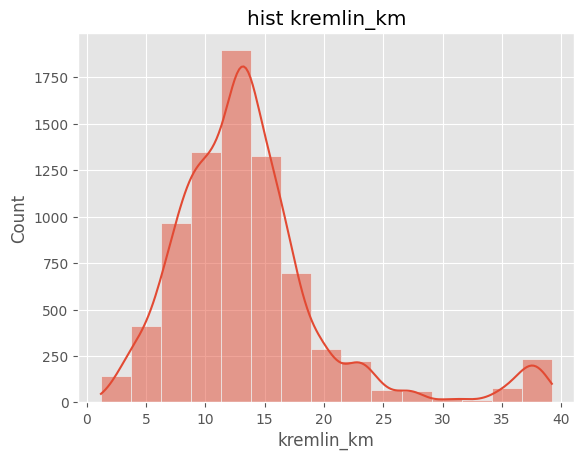

In [77]:
for column in tr_stay:
    sns.histplot(data[column], kde=True,bins = 15)
    plt.title(f"hist {column}")
    plt.show()

#### Распределение не идеально, но лучше, чем было. Удаляем остальные признаки.

In [78]:
data.drop(columns = tr_remove, inplace=True)

## 4.5. Другие признаки

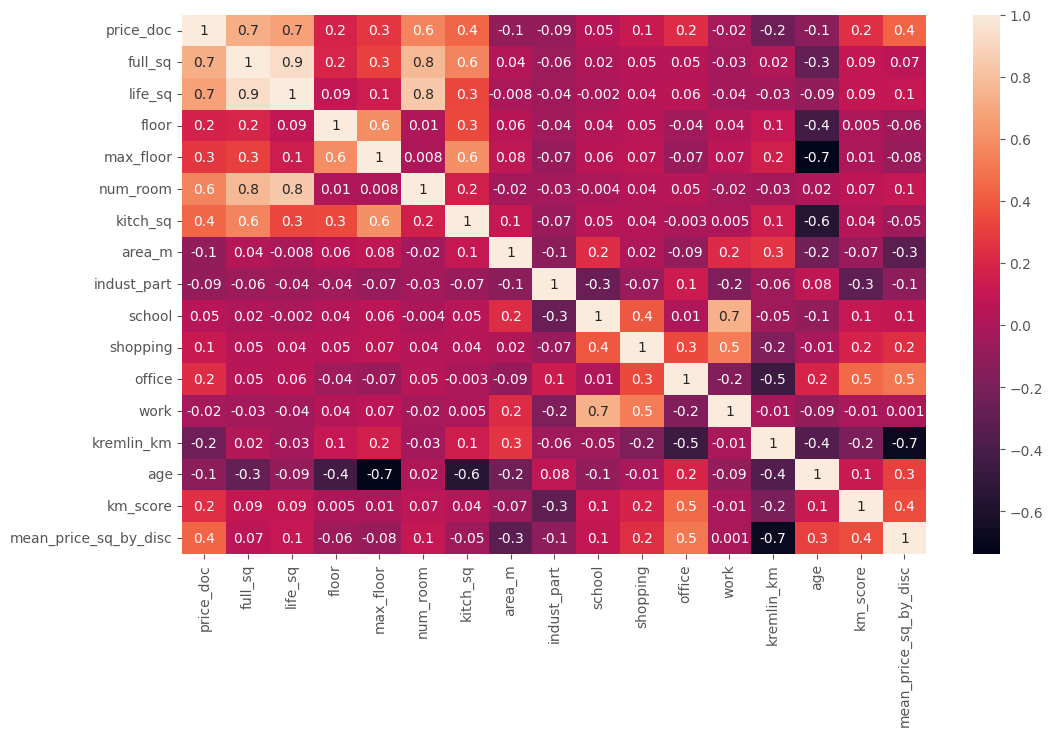

In [79]:
numeric_cols_3 = data.select_dtypes(include=['int', 'float', 'bool'])
plt.figure(figsize=(12, 7))
sns.heatmap(numeric_cols_3.corr(),annot = True, fmt='.1g')
plt.show()

#### Признаки life_sq, num_room и kitch_sq создают сильную мультиколлинеарность с full_sq и не несут значимой смысловой нагрузки для прогнозирования цены, особенно учитывая, что методы расчёта этих параметров не всегда объективны.

#### Исключим оставшиеся транспортные признаки, так как в полном наборе данных было выявлено, что он демонстрирует сильную мультиколлинеарность.

#### Также мы исключаем этажи и возраст зданий, так как они создают мультиколлинеарность друг с другом и с параметром max_floors. При этом показатель max_floors может быть использован для связи цены с возрастом зданий.


In [80]:
rem_l = ['life_sq','floor','num_room','age','kitch_sq','area_m','indust_part','school','work','kremlin_km']

In [81]:
data.drop(columns = rem_l, inplace=True)

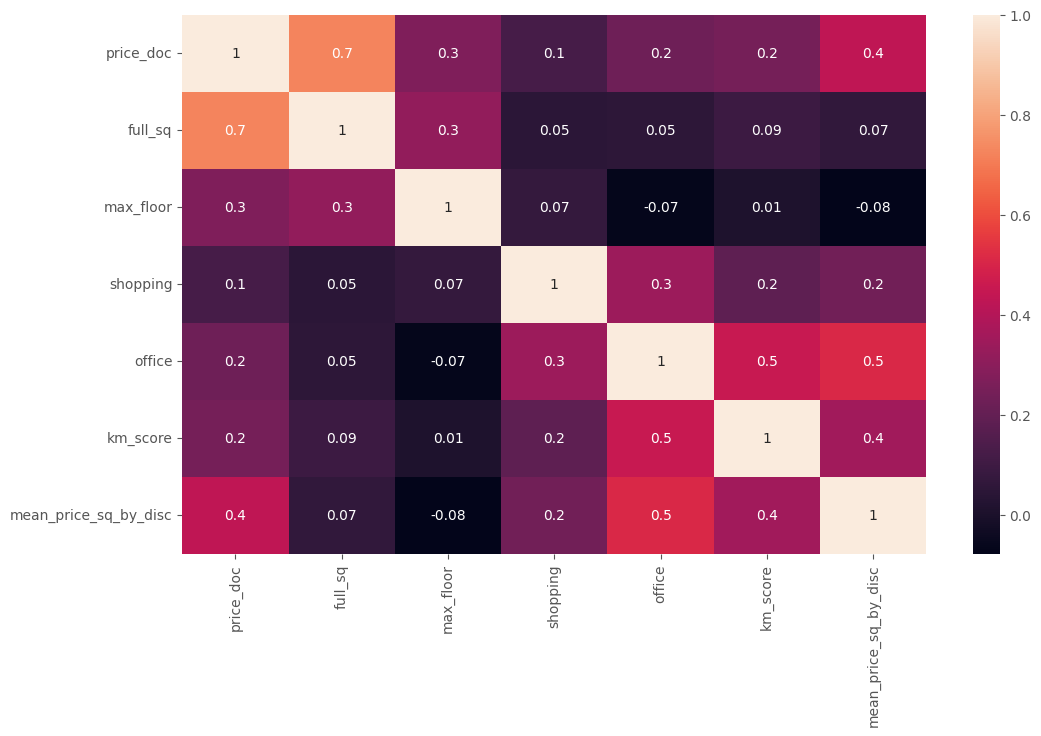

In [82]:
numeric_cols_4 = data.select_dtypes(include=['int', 'float', 'bool'])
plt.figure(figsize=(12, 7))
sns.heatmap(numeric_cols_4.corr(),annot = True, fmt='.1g')
plt.show()

In [83]:
for i in ['price_doc','full_sq','max_floor','office','km_score','mean_price_sq_by_disc']:
    print(f'{i}:',pearsonr(data['price_doc'], data[i]))

price_doc: PearsonRResult(statistic=1.0, pvalue=0.0)
full_sq: PearsonRResult(statistic=0.72524823952961, pvalue=0.0)
max_floor: PearsonRResult(statistic=0.26835019058112325, pvalue=2.898665911129385e-128)
office: PearsonRResult(statistic=0.22833090628131164, pvalue=1.9078657818511166e-92)
km_score: PearsonRResult(statistic=0.24412694712001948, pvalue=8.282165580145228e-106)
mean_price_sq_by_disc: PearsonRResult(statistic=0.4315191874824696, pvalue=0.0)


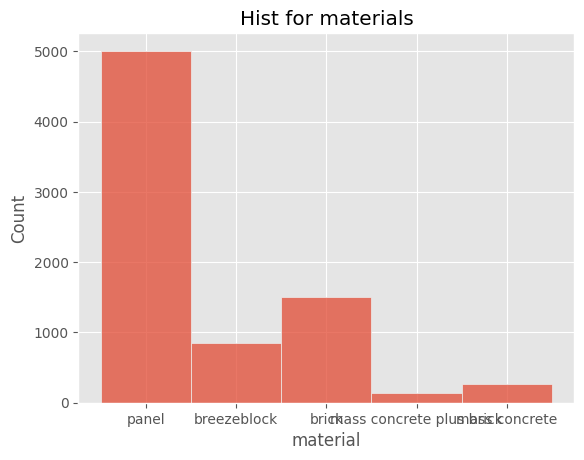

In [84]:
sns.histplot(data['material'],bins = 15)
plt.title("Hist for materials")
plt.show()

#### One-hot encoding призака 'material'

In [85]:
material_dummies = pd.get_dummies(data['material']).astype(int)

data.drop(columns=['material'], inplace=True)

data = pd.concat([data, material_dummies], axis=1)

In [86]:
data.head()

price_doc  full_sq  max_floor  shopping  office      km_score  \
0    5150000       38       14.0         5       1  7.626188e+06   
1    5980000       41       16.0         0       7  9.560290e+06   
2    4600000       41       14.0         4       1  6.520316e+06   
3    5650000       38       17.0         5       0  9.988493e+06   
4    9300000       58        9.0         5       1  7.689244e+06   

   mean_price_sq_by_disc  breezeblock  brick  mass concrete  \
0              143440.26            0      0              0   
1              174151.66            0      0              0   
2              120807.06            0      0              0   
3              148005.90            0      0              0   
4              156672.91            0      0              0   

   mass concrete plus brick  panel  
0                         0      1  
1                         0      1  
2                         0      1  
3                         0      1  
4                         0      1

#### Создадим критерии для оценки стоимости квартиры:

- дешёвая — меньше 33-го процентиля,
- средняя — между 33-м и 66-м процентилями,
- дорогая — больше 66-го процентиля.

In [87]:
quantile_33 = data['price_doc'].quantile(0.33)
quantile_66 = data['price_doc'].quantile(0.66)

In [88]:
quantile_33

6300000.0

In [89]:
quantile_66

8400000.0

In [90]:
data['low_prices'] = (data['price_doc'] < quantile_33).astype(int)

data['mid_prices'] = ((data['price_doc'] <= quantile_66) & (data['price_doc'] >= quantile_33)).astype(int)

data['high_prices'] = (data['price_doc'] > quantile_66).astype(int)

In [91]:
data

price_doc  full_sq  max_floor  shopping  office      km_score  \
0       5150000       38       14.0         5       1  7.626188e+06   
1       5980000       41       16.0         0       7  9.560290e+06   
2       4600000       41       14.0         4       1  6.520316e+06   
3       5650000       38       17.0         5       0  9.988493e+06   
4       9300000       58        9.0         5       1  7.689244e+06   
...         ...      ...        ...       ...     ...           ...   
8889    8300000       51       12.0         2       8  7.469152e+06   
8890   12800000       76       16.0        15       2  9.988493e+06   
8891   15500000       78       17.0         8       0  1.071755e+07   
8892    8350000       54       16.0         1       0  8.837689e+06   
8893    7400000       45       12.0         9       9  6.690200e+06   

      mean_price_sq_by_disc  breezeblock  brick  mass concrete  \
0                 143440.26            0      0              0   
1                 174151.66            0      0              0   
2                 120807.06            0      0              0   
3                 148005.90            0      0              0   
4                 156672.91            0      0              0   
...                     ...          ...    ...            ...   
8889              148523.63            1      0              0   
8890              149346.88            0      0              0   
8891              158895.89            0      0              0   
8892              142956.49            1      0              0   
8893              152695.00            0      0              0   

      mass concrete plus brick  panel  low_prices  mid_prices  high_prices  
0                            0      1           1           0            0  
1                            0      1           1           0            0  
2                            0      1           1           0            0  
3                            0      1           1           0            0  
4                            0      1           0           0            1  
...                        ...    ...         ...         ...          ...  
8889                         0      0           0           1            0  
8890                         0      1           0           0            1  
8891                         0      1           0           0            1  
8892                         0      0           0           1            0  
8893                         0      1           0           1            0  

[7770 rows x 15 columns]

In [92]:
data.low_prices.value_counts()

low_prices
0    5249
1    2521
Name: count, dtype: int64

In [93]:
data.mid_prices.value_counts()

mid_prices
0    5113
1    2657
Name: count, dtype: int64

In [94]:
data.high_prices.value_counts()

high_prices
0    5178
1    2592
Name: count, dtype: int64

In [95]:
l = data.columns
l = l[0:7]

In [96]:
print(*l)

price_doc full_sq max_floor shopping office km_score mean_price_sq_by_disc


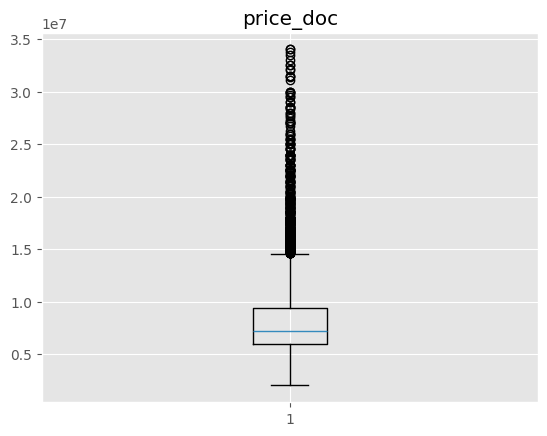

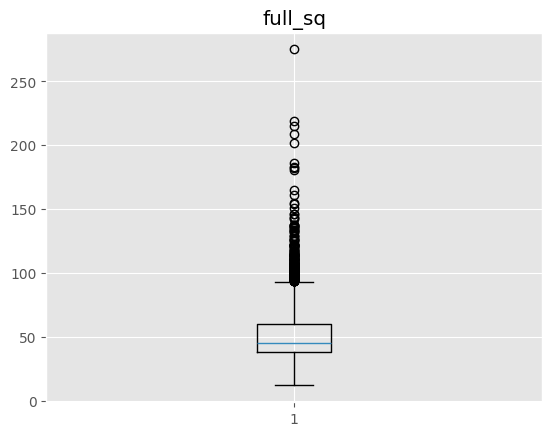

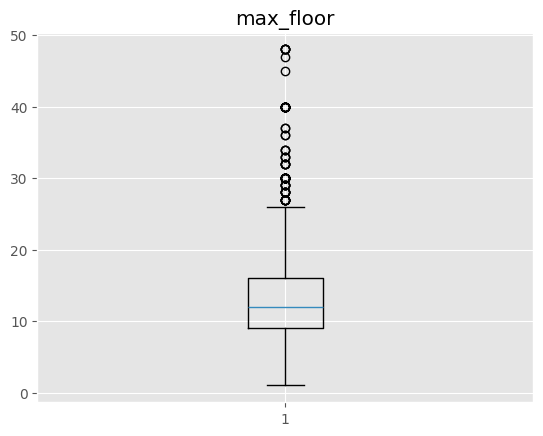

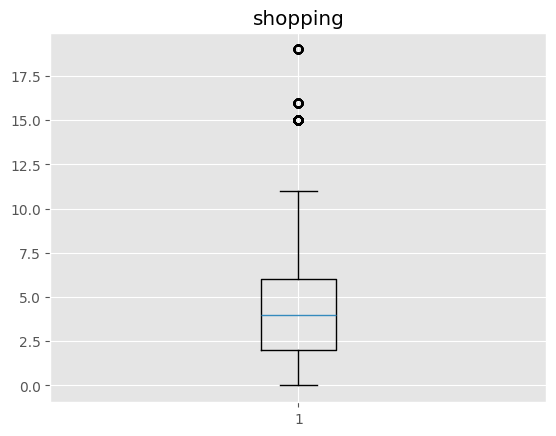

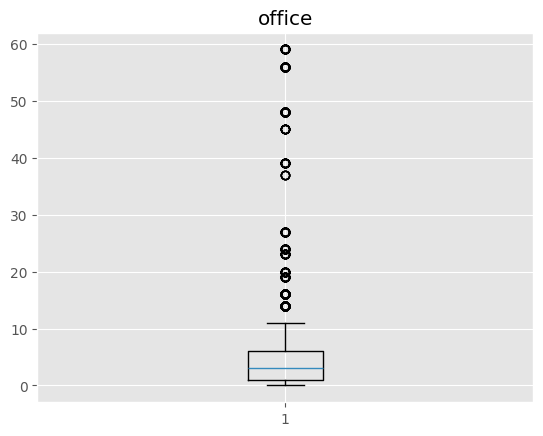

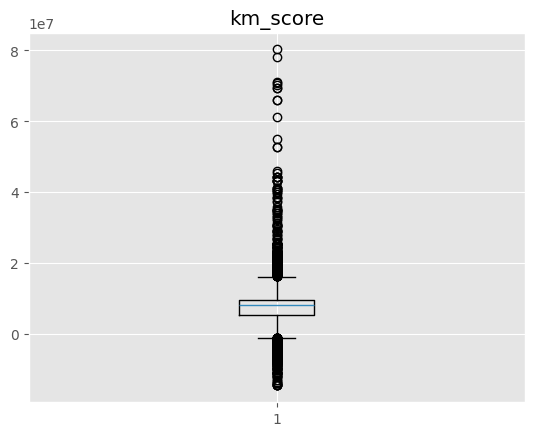

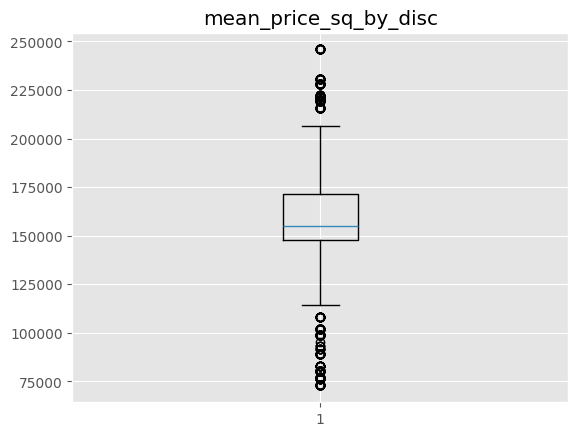

In [97]:
j = 0
for i in l:
    plt.figure(num=j)
    plt.boxplot(data[i])
    plt.title(i)
    j = j + 1

#### На графиках видим большое количество выбросов, но мы не будем их исключать, так как в этом случае мы потеряем много необходимых данных, которые просто не попадают в основную выборку.

In [98]:
data.head()

price_doc  full_sq  max_floor  shopping  office      km_score  \
0    5150000       38       14.0         5       1  7.626188e+06   
1    5980000       41       16.0         0       7  9.560290e+06   
2    4600000       41       14.0         4       1  6.520316e+06   
3    5650000       38       17.0         5       0  9.988493e+06   
4    9300000       58        9.0         5       1  7.689244e+06   

   mean_price_sq_by_disc  breezeblock  brick  mass concrete  \
0              143440.26            0      0              0   
1              174151.66            0      0              0   
2              120807.06            0      0              0   
3              148005.90            0      0              0   
4              156672.91            0      0              0   

   mass concrete plus brick  panel  low_prices  mid_prices  high_prices  
0                         0      1           1           0            0  
1                         0      1           1           0            0  
2                         0      1           1           0            0  
3                         0      1           1           0            0  
4                         0      1           0           0            1

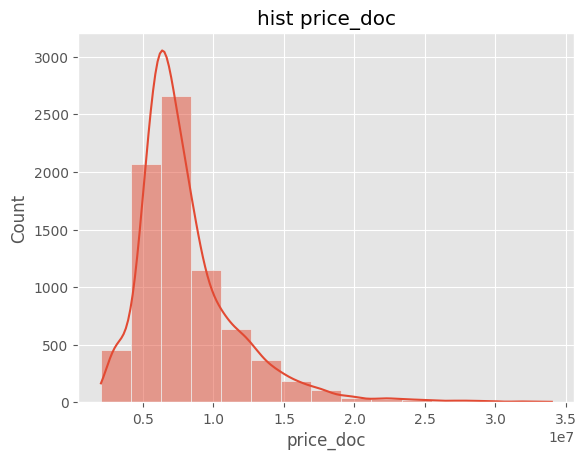

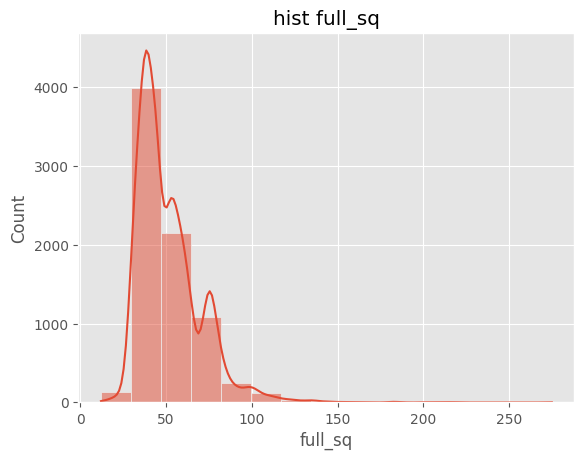

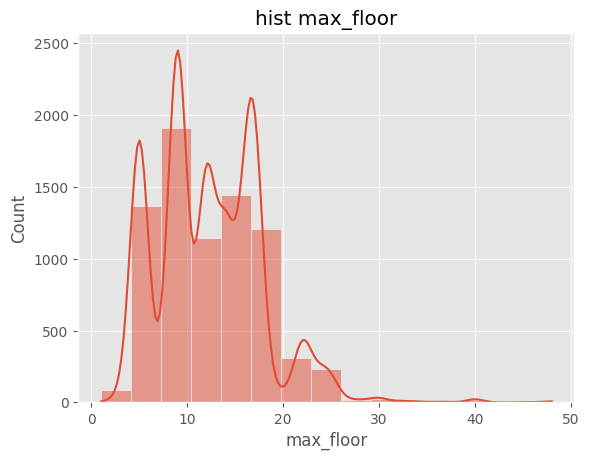

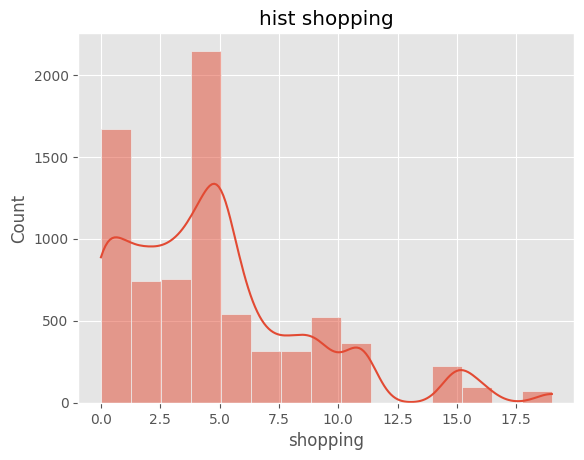

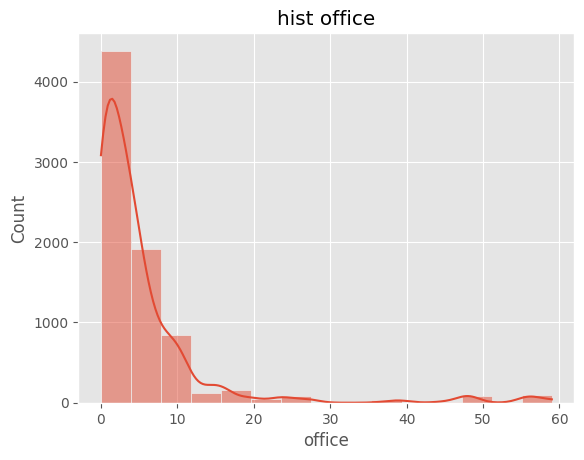

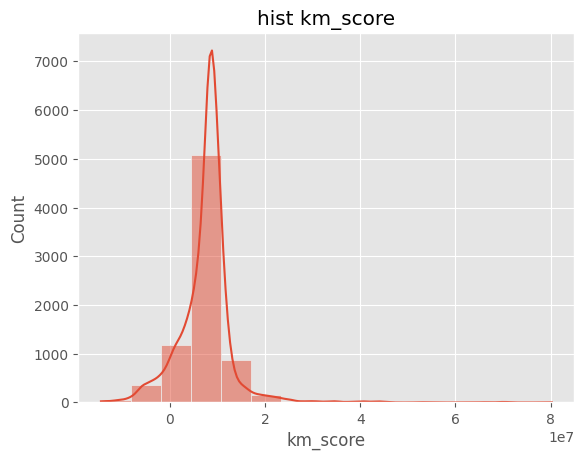

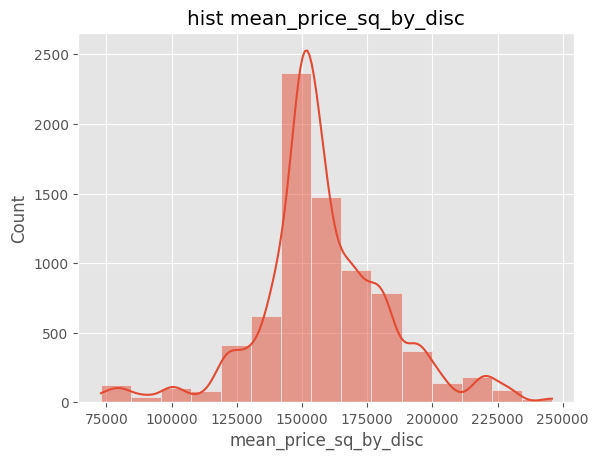

In [99]:
for column in l:
    sns.histplot(data[column], kde=True,bins = 15)
    plt.title(f"hist {column}")
    plt.show()

# 5. Модели регрессии.

## 5.1. Многомерная линейная регрессия

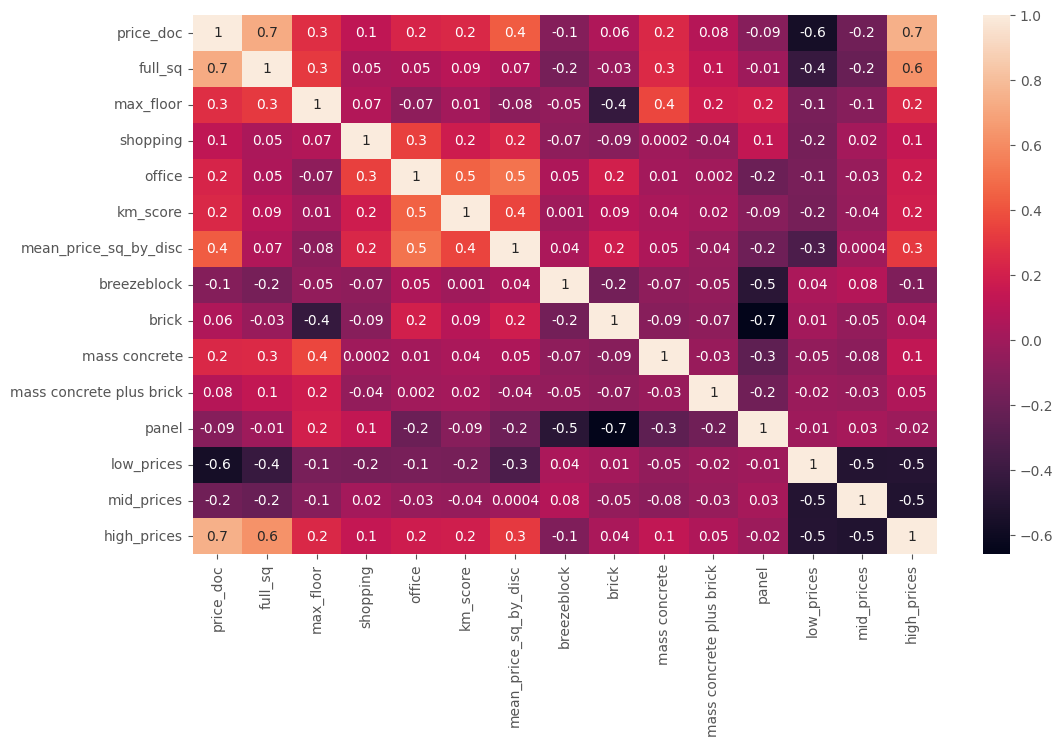

In [100]:
plt.figure(figsize=(12, 7))
sns.heatmap(data.corr(),annot = True, fmt='.1g')
plt.show()

In [101]:
data.head()

price_doc  full_sq  max_floor  shopping  office      km_score  \
0    5150000       38       14.0         5       1  7.626188e+06   
1    5980000       41       16.0         0       7  9.560290e+06   
2    4600000       41       14.0         4       1  6.520316e+06   
3    5650000       38       17.0         5       0  9.988493e+06   
4    9300000       58        9.0         5       1  7.689244e+06   

   mean_price_sq_by_disc  breezeblock  brick  mass concrete  \
0              143440.26            0      0              0   
1              174151.66            0      0              0   
2              120807.06            0      0              0   
3              148005.90            0      0              0   
4              156672.91            0      0              0   

   mass concrete plus brick  panel  low_prices  mid_prices  high_prices  
0                         0      1           1           0            0  
1                         0      1           1           0            0  
2                         0      1           1           0            0  
3                         0      1           1           0            0  
4                         0      1           0           0            1

In [102]:
mean_values = data.mean()
mean_values

price_doc                   8.165852e+06
full_sq                     5.146976e+01
max_floor                   1.225097e+01
shopping                    4.818919e+00
office                      5.351094e+00
km_score                    7.598383e+06
mean_price_sq_by_disc       1.580396e+05
breezeblock                 1.100386e-01
brick                       1.929215e-01
mass concrete               3.474903e-02
mass concrete plus brick    1.763192e-02
panel                       6.446589e-01
low_prices                  3.244530e-01
mid_prices                  3.419562e-01
high_prices                 3.335907e-01
dtype: float64

In [103]:
data.shape[0]

7770

#### Числовые признаки

In [104]:
n_cols = ['price_doc','full_sq','max_floor','shopping','office','km_score','mean_price_sq_by_disc']

#### Номинативные признаки

In [105]:
o_cols = ['breezeblock','brick','mass concrete','mass concrete plus brick','panel','low_prices','mid_prices','high_prices']

#### Стандартизируем данные

In [106]:
scaler = StandardScaler()

In [107]:
ds_n_scaled = scaler.fit_transform(data[n_cols])

In [108]:
ds_n = pd.DataFrame(ds_n_scaled, columns=n_cols)

In [109]:
round(ds_n.describe(),2)

price_doc  full_sq  max_floor  shopping   office  km_score  \
count    7770.00  7770.00    7770.00   7770.00  7770.00   7770.00   
mean        0.00     0.00      -0.00      0.00     0.00      0.00   
std         1.00     1.00       1.00      1.00     1.00      1.00   
min        -1.63    -2.10      -2.03     -1.22    -0.59     -3.73   
25%        -0.59    -0.72      -0.59     -0.72    -0.48     -0.37   
50%        -0.26    -0.34      -0.05     -0.21    -0.26      0.10   
75%         0.33     0.45       0.68      0.30     0.07      0.36   
max         6.84    11.89       6.46      3.60     5.96     12.26   

       mean_price_sq_by_disc  
count                7770.00  
mean                   -0.00  
std                     1.00  
min                    -3.30  
25%                    -0.39  
50%                    -0.12  
75%                     0.52  
max                     3.41

#### Обратно скомбинируем признаки

In [110]:
model_stroy = pd.concat([ds_n.reset_index(drop=True), data[o_cols].reset_index(drop=True)], axis=1)

#### Проверим не появлилось ли NaN занчений после стандартизации

In [111]:
model_stroy.isna().sum()

price_doc                   0
full_sq                     0
max_floor                   0
shopping                    0
office                      0
km_score                    0
mean_price_sq_by_disc       0
breezeblock                 0
brick                       0
mass concrete               0
mass concrete plus brick    0
panel                       0
low_prices                  0
mid_prices                  0
high_prices                 0
dtype: int64

In [112]:
ds = model_stroy.copy()
ds.head()

price_doc   full_sq  max_floor  shopping    office  km_score  \
0  -0.798489 -0.716410   0.316215  0.045977 -0.483090  0.004690   
1  -0.578735 -0.556850   0.677804 -1.223533  0.183073  0.330888   
2  -0.944109 -0.556850   0.316215 -0.207925 -0.483090 -0.181822   
3  -0.666107 -0.716410   0.858598  0.045977 -0.594117  0.403107   
4   0.300281  0.347321  -0.587756  0.045977 -0.483090  0.015324   

   mean_price_sq_by_disc  breezeblock  brick  mass concrete  \
0              -0.566602            0      0              0   
1               0.625313            0      0              0   
2              -1.445001            0      0              0   
3              -0.389409            0      0              0   
4              -0.053040            0      0              0   

   mass concrete plus brick  panel  low_prices  mid_prices  high_prices  
0                         0      1           1           0            0  
1                         0      1           1           0            0  
2                         0      1           1           0            0  
3                         0      1           1           0            0  
4                         0      1           0           0            1

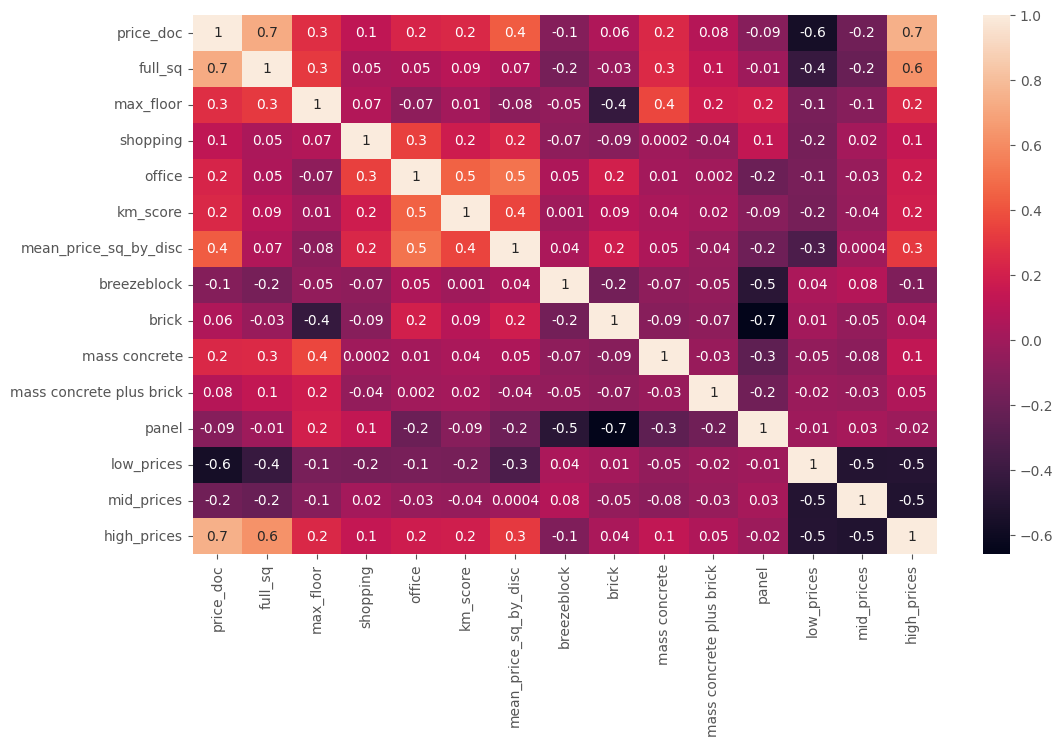

In [113]:
plt.figure(figsize=(12, 7))
sns.heatmap(ds.corr(),annot = True, fmt='.1g')
plt.show()

### 5.1.1. Многомерная линейная регрессия №1

In [114]:
metric_4 = ds.columns

In [115]:
ds_1 = ds[metric_4]
ds_1.head()

price_doc   full_sq  max_floor  shopping    office  km_score  \
0  -0.798489 -0.716410   0.316215  0.045977 -0.483090  0.004690   
1  -0.578735 -0.556850   0.677804 -1.223533  0.183073  0.330888   
2  -0.944109 -0.556850   0.316215 -0.207925 -0.483090 -0.181822   
3  -0.666107 -0.716410   0.858598  0.045977 -0.594117  0.403107   
4   0.300281  0.347321  -0.587756  0.045977 -0.483090  0.015324   

   mean_price_sq_by_disc  breezeblock  brick  mass concrete  \
0              -0.566602            0      0              0   
1               0.625313            0      0              0   
2              -1.445001            0      0              0   
3              -0.389409            0      0              0   
4              -0.053040            0      0              0   

   mass concrete plus brick  panel  low_prices  mid_prices  high_prices  
0                         0      1           1           0            0  
1                         0      1           1           0            0  
2                         0      1           1           0            0  
3                         0      1           1           0            0  
4                         0      1           0           0            1

#### Разделим данные на обучающию и тестовую выборку 70 на 30 процентов соотвественно

In [116]:
X_train, X_test, y_train, y_test = train_test_split(
    ds_1.drop('price_doc', axis = 1), 
    ds_1['price_doc'], 
    test_size=0.3, 
    random_state=999)

In [117]:
lin_reg = make_pipeline(StandardScaler(), LinearRegression())
lin_reg.fit(X_train, y_train)
y_approx_1 = lin_reg.predict(X_train)
y_pred_1 = lin_reg.predict(X_test)

In [118]:
model = LinearRegression()

model.fit(X_train, y_train)

y_approx_1 = model.predict(X_train)
predictions = model.predict(X_test)
print( 
  'mean_squared_error : ', mean_squared_error(y_test, predictions)) 
print( 
  'mean_absolute_error : ', mean_absolute_error(y_test, predictions)) 
print('r2_score : ', r2_score(y_test, predictions))
print(predictions)

mean_squared_error :  0.2670647400196361
mean_absolute_error :  0.31624864050108525
r2_score :  0.7384963777766467
[-0.3732241  -0.5613245   0.94293888 ... -0.76962983  0.93114178
  0.92771615]


In [119]:
print(scaler.mean_)
print(scaler.scale_)

[8.16585227e+06 5.14697555e+01 1.22509653e+01 4.81891892e+00
 5.35109395e+00 7.59838276e+06 1.58039572e+05]
[3.77694907e+06 1.88017476e+01 5.53115219e+00 3.93852730e+00
 9.00680578e+00 5.92922718e+06 2.57664234e+04]


In [120]:
max_err = -1
i_max_err = -1
pred_max_err = -1
act_max_err = -1
sum_err = 0
for i,p in enumerate(predictions):
    pred = round(p*scaler.scale_[0] + scaler.mean_[0])
    act = round(y_test.iloc[i]*scaler.scale_[0] + scaler.mean_[0])
    err = np.abs((act-pred)/act*100)
    sum_err += err
    if err > max_err:
        max_err = err
        i_max_err = i
        pred_max_err = pred
        act_max_err = act
    # print(f"{p} = \n{pred}\n{act}\n{np.abs(act-pred)}\n{err}")
    # print('-'*10)
print(max_err)
print(pred_max_err)  
print(act_max_err)
print(sum_err/len(predictions))


308.0680454545455
8977497
2200000
16.736695538434617


## 5.1. Алгоритм случайного леса

In [121]:
X_train, X_test, y_train, y_test = train_test_split(
    ds_1.drop('price_doc', axis = 1), 
    ds_1['price_doc'], 
    test_size=0.3, 
    random_state=42)

In [122]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

In [123]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [124]:
y_pred = rf_model.predict(X_test)

In [125]:
print(y_pred)
print( 
  'mean_squared_error : ', mean_squared_error(y_test, y_pred)) 
print( 
  'mean_absolute_error : ', mean_absolute_error(y_test, y_pred)) 
print('r2_score : ', r2_score(y_test, y_pred))

[-0.94822096 -0.31471228  0.29460226 ...  1.40077286  1.15994356
  1.13044885]
mean_squared_error :  0.10206807807770214
mean_absolute_error :  0.19606137099723706
r2_score :  0.8964858807541446


In [126]:
max_err = -1
i_max_err = -1
pred_max_err = -1
act_max_err = -1
sum_err = 0
for i,p in enumerate(y_pred):
    pred = round(p*scaler.scale_[0] + scaler.mean_[0])
    act = round(y_test.iloc[i]*scaler.scale_[0] + scaler.mean_[0])
    err = np.abs((act-pred)/act*100)
    sum_err += err
    if err > max_err:
        max_err = err
        i_max_err = i
        pred_max_err = pred
        act_max_err = act
    #print(f"{p} = \n{pred}\n{act}\n{np.abs(act-pred)}\n{err}")
    #print('-'*10)
print(max_err)
print(pred_max_err)  
print(act_max_err)
print(sum_err/len(predictions))


172.58023809523812
5724185
2100000
9.725044480438996


#### Воспользуемся сеточным поиском гиперпараметров, чтобы улучшить качество модели

In [127]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42), 
                           param_grid=param_grid, 
                           cv=5, 
                           scoring='r2', 
                           n_jobs=-1)


In [128]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='r2')

In [129]:
print("Best parameters:", grid_search.best_params_)

Best parameters: {'max_depth': None, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}


In [130]:
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

RandomForestRegressor(max_features=None, min_samples_leaf=4,
                      min_samples_split=10, n_estimators=300, random_state=42)

In [131]:
y_pred = best_model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R^2 на тестовой выборке: {r2:.4f}")
print(f"Среднеквадратичная ошибка (MSE): {mse:.4f}")

R^2 на тестовой выборке: 0.8988
Среднеквадратичная ошибка (MSE): 0.0998


#### Используем кросс валидацию

In [134]:
scores = cross_val_score(RandomForestRegressor(random_state=42), 
                         X_train, y_train, 
                         cv=5, 
                         scoring='r2')

print(f"Средний R^2: {scores.mean()}, Дисперсия: {scores.std()}")

Средний R^2: 0.8407618620796619, Дисперсия: 0.02205884200866464
